In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

In [4]:
# Data display coustomization
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Data Preparation

### Data Loading

In [6]:
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Duplicate Check

In [7]:
lead_dub = lead.copy()

# Checking for duplicates and dropping the entire duplicate row if any
lead_dub.drop_duplicates(subset=None, inplace=True)
lead_dub.shape

(9240, 37)

In [8]:
lead.shape

(9240, 37)

The shape after running the drop duplicate command is same as the original dataframe.

Hence we can conclude that there were zero duplicate values in the dataset.

## Data Inspection

In [9]:
lead.shape

(9240, 37)

In [10]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning

In [12]:
# As we can observe that there are select values for many column.
#This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.
lead = lead.replace('Select', np.nan)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [13]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [14]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [17]:
# Calculate the percentage of missing values for each column
missing_percentages = round(100 * (lead.isnull().sum() / len(lead)), 2)

# Get the column names where the missing percentage is greater than 60%
cols_to_drop = missing_percentages[missing_percentages > 60].index

# Drop the columns along the columns axis (axis=1)
lead.drop(columns=cols_to_drop, inplace=True)


In [18]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [20]:
#dropping Lead Number and Prospect ID since they have all unique values


lead.drop(columns=['Prospect ID', 'Lead Number'], inplace=True)


In [21]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Now we will take care of null values in each column one by one.


In [ ]:
# Lead Quality: Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead

In [22]:
lead['Lead Quality'].value_counts()


Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [23]:
lead['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

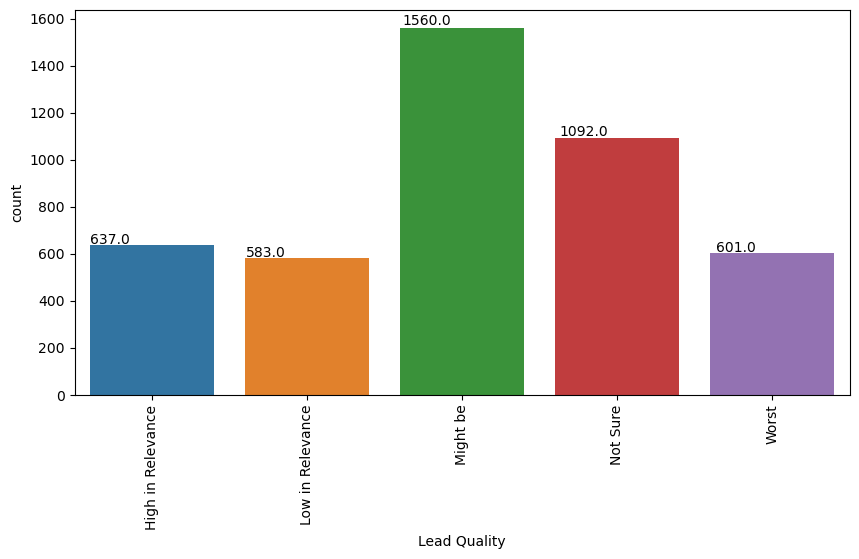

In [31]:

# Convert 'Lead Quality' column to categorical type
lead['Lead Quality'] = lead['Lead Quality'].astype('category')

# Plot the countplot
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=lead, x='Lead Quality')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

plt.xticks(rotation=90)
plt.show()


In [32]:
# As Lead quality is based on the impression employee & the lead, 
#if anything is left blank we can impute 'Not Sure' in NaN safely.

lead['Lead Quality'] = lead['Lead Quality'].replace(np.nan, 'Not Sure')


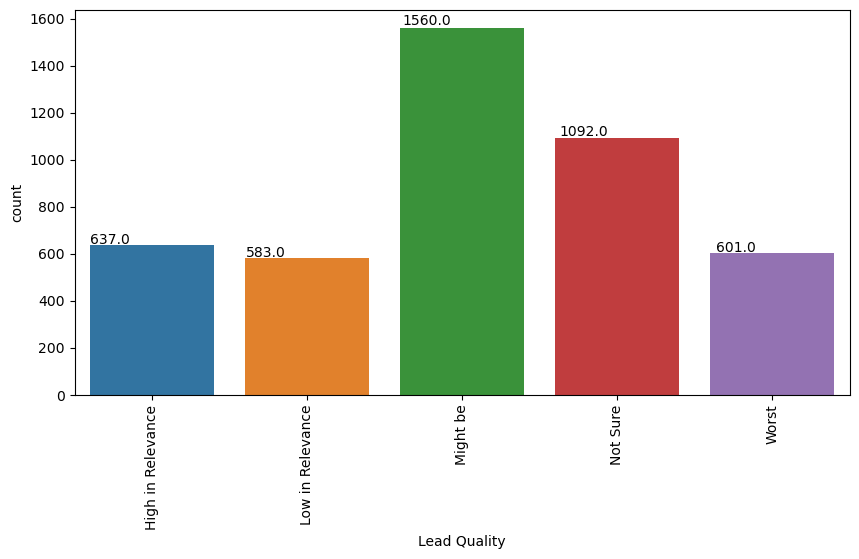

In [34]:
# Plot the countplot
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=lead, x='Lead Quality')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

plt.xticks(rotation=90)
plt.show()


This are few field where human psychology, consumer behavior & business understanding overpowers the statistic interpretation of the data 

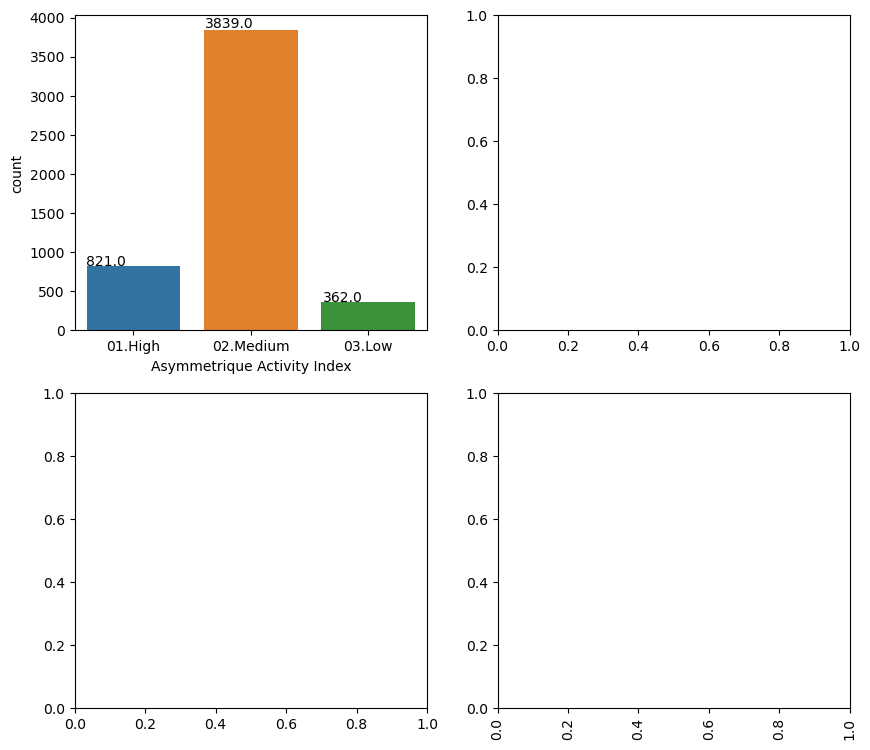

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Asymmetrique Activity Index' column to categorical type if needed
lead['Asymmetrique Activity Index'] = lead['Asymmetrique Activity Index'].astype('category')

# Plot the countplot
fig, axs = plt.subplots(2, 2, figsize=(10, 9))
plt1 = sns.countplot(data=lead, x='Asymmetrique Activity Index', ax=axs[0, 0])

for p in plt1.patches:
    plt1.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

plt.xticks(rotation=90)
plt.show()


In [ ]:
# There is too much variation in thes parameters so its not reliable to impute any value in it. 
# 45% null values means we need to drop these columns.

In [47]:
lead = lead.drop(['Asymmetrique Activity Index', 'Asymmetrique Activity Score',
                  'Asymmetrique Profile Index', 'Asymmetrique Profile Score'], axis=1)


In [48]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

# City

In [44]:
lead.City.value_counts()


City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [45]:
lead.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

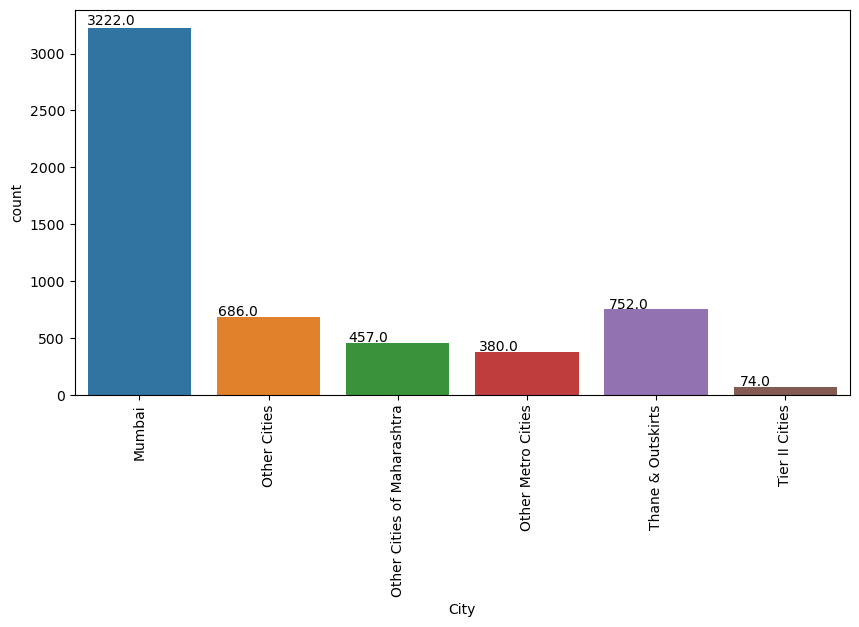

In [50]:

# Convert 'City' column to categorical type
lead['City'] = lead['City'].astype('category')

# Plot the countplot
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=lead, x='City')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

plt.xticks(rotation=90)
plt.show()


In [ ]:
# Around 57.8% of the data available  is Mumbai so we can impute Mumbai in the missing values.

In [51]:
lead['City'] = lead['City'].replace(np.nan, 'Mumbai')

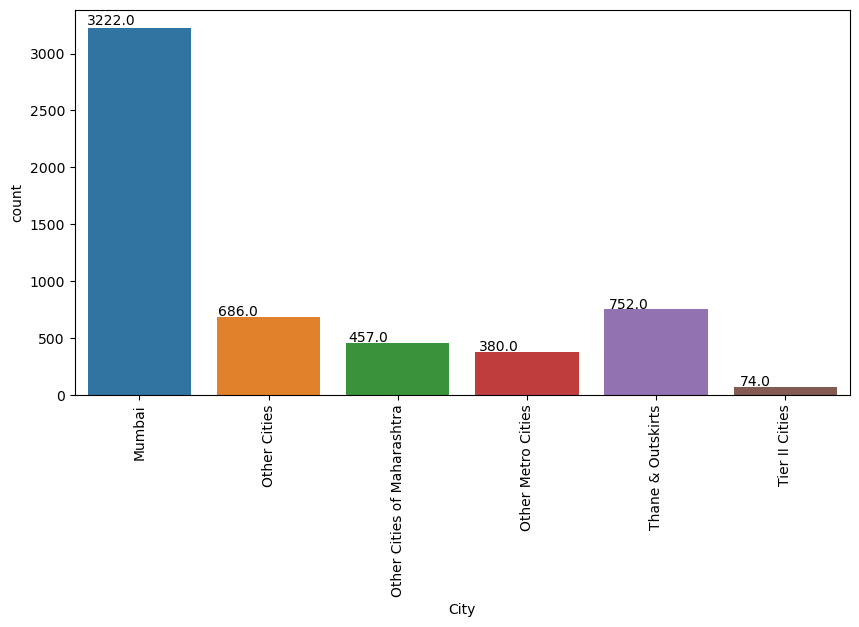

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'City' column to categorical type
lead['City'] = lead['City'].astype('category')

# Plot the countplot
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=lead, x='City')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

plt.xticks(rotation=90)
plt.show()


# Specailization

In [58]:
lead.Specialization.describe()

count       9240
unique        19
top       Others
freq        3380
Name: Specialization, dtype: object

In [57]:
lead.Specialization.value_counts()

Specialization
Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [55]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')

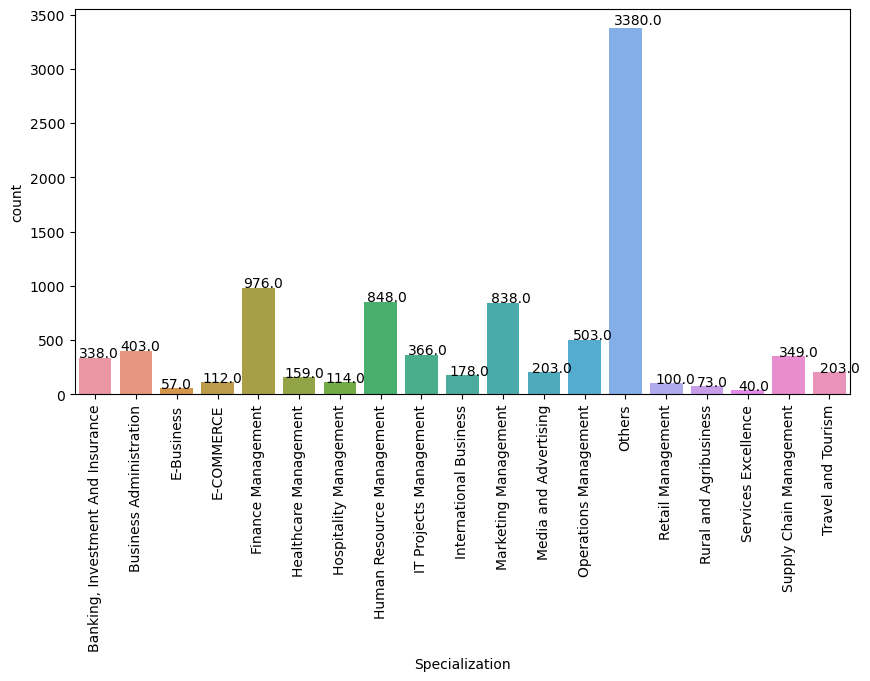

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Specialization' column to categorical type
lead['Specialization'] = lead['Specialization'].astype('category')

# Plot the countplot
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=lead, x='Specialization')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

plt.xticks(rotation=90)
plt.show()


In [60]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [61]:
# Tags

In [62]:
lead.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [63]:
lead.Tags.value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

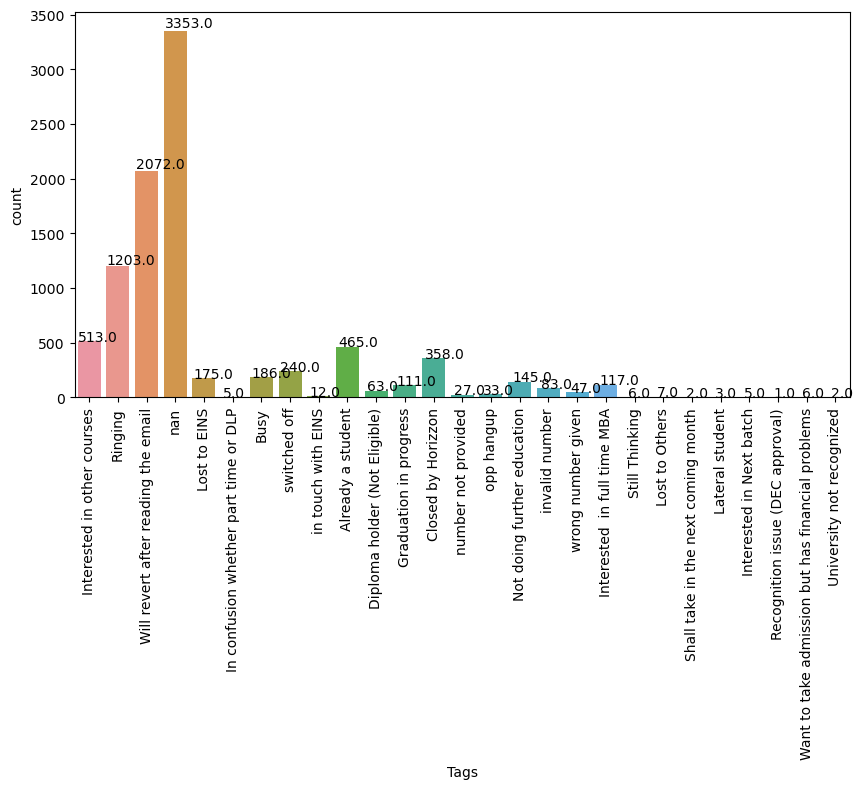

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Tags' column to string type
lead['Tags'] = lead['Tags'].astype(str)

# Plot the countplot
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=lead, x='Tags')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

plt.xticks(rotation=90)
plt.show()


In [68]:
# Blanks in the tag column may be imputed by 'Will revert after reading the email'.

In [69]:
lead['Tags'] = lead['Tags'].replace(np.nan, 'Will revert after reading the email')

In [ ]:
# What matters most to you in choosing a course

In [71]:
lead['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [72]:
lead['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

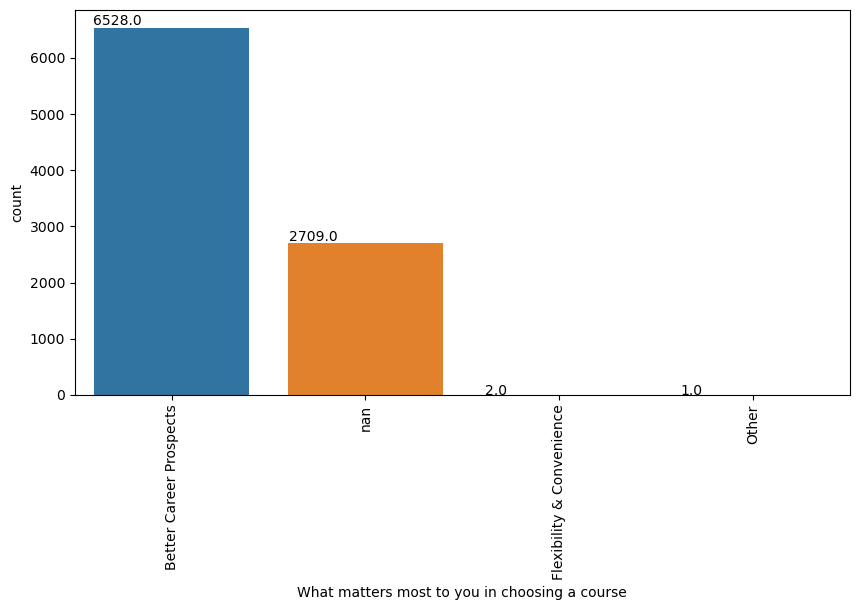

In [74]:


# Convert the column to string type
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].astype(str)

# Plot the countplot
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=lead, x='What matters most to you in choosing a course')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

plt.xticks(rotation=90)
plt.show()


In [ ]:
# Blanks in the this column may be imputed by 'Better Career Prospects'.

In [ ]:
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

# Occupation

In [77]:
lead['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [78]:
lead['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

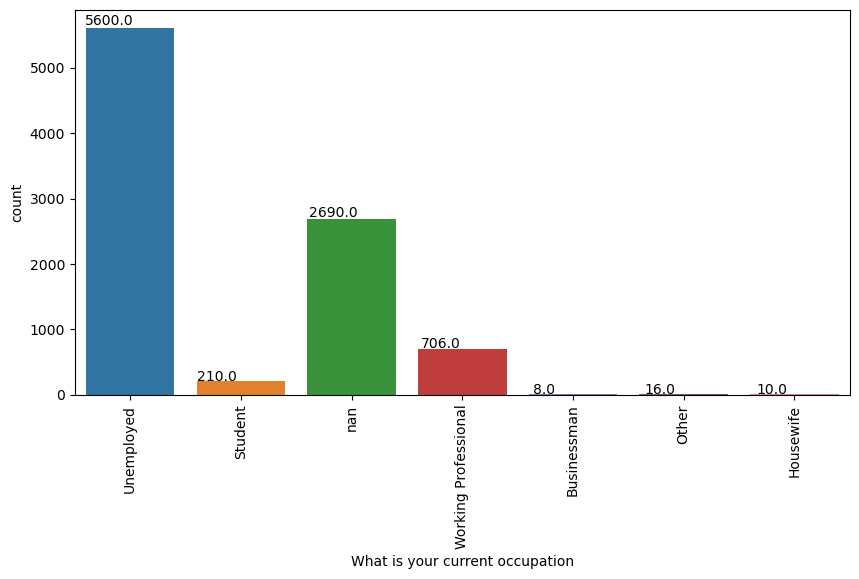

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the column to string type
lead['What is your current occupation'] = lead['What is your current occupation'].astype(str)

# Plot the countplot
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=lead, x='What is your current occupation')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

plt.xticks(rotation=90)
plt.show()


In [82]:
# 86% entries are of Unemployed so we can impute "Unemployed" in it.

In [83]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

['Unemployed' 'Student' 'nan' 'Working Professional' 'Businessman' 'Other'
 'Housewife']


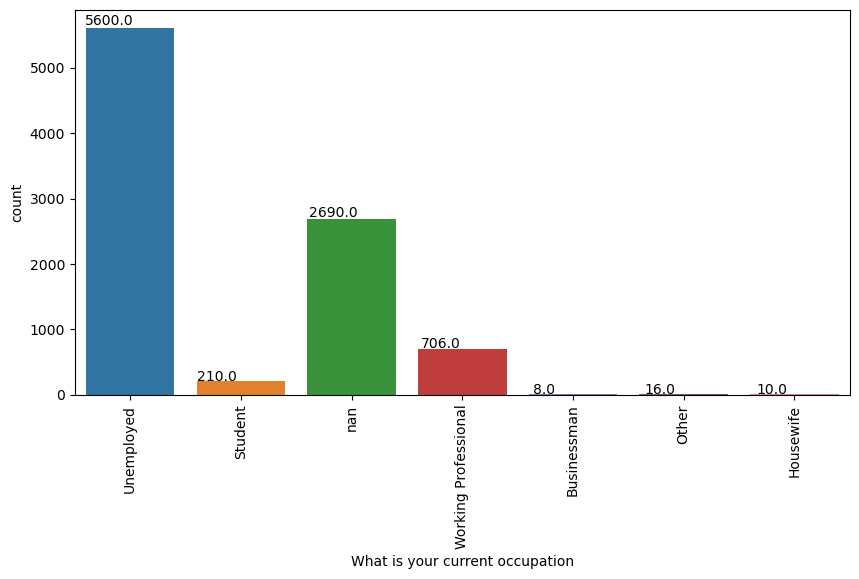

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the unique values in the 'What is your current occupation' column
print(lead['What is your current occupation'].unique())

# If there are non-numeric values like 'Unemployed', ensure the column is of string or categorical type
lead['What is your current occupation'] = lead['What is your current occupation'].astype(str)

# Plot the countplot
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=lead, x='What is your current occupation')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

plt.xticks(rotation=90)
plt.show()


In [ ]:
# Country

In [85]:
lead['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [86]:
lead['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

['India' 'Russia' 'Kuwait' 'Oman' 'United Arab Emirates' 'United States'
 'Australia' 'United Kingdom' 'Bahrain' 'Ghana' 'Singapore' 'Qatar'
 'Saudi Arabia' 'Belgium' 'France' 'Sri Lanka' 'China' 'Canada'
 'Netherlands' 'Sweden' 'Nigeria' 'Hong Kong' 'Germany'
 'Asia/Pacific Region' 'Uganda' 'Kenya' 'Italy' 'South Africa' 'Tanzania'
 'unknown' 'Malaysia' 'Liberia' 'Switzerland' 'Denmark' 'Philippines'
 'Bangladesh' 'Vietnam' 'Indonesia']


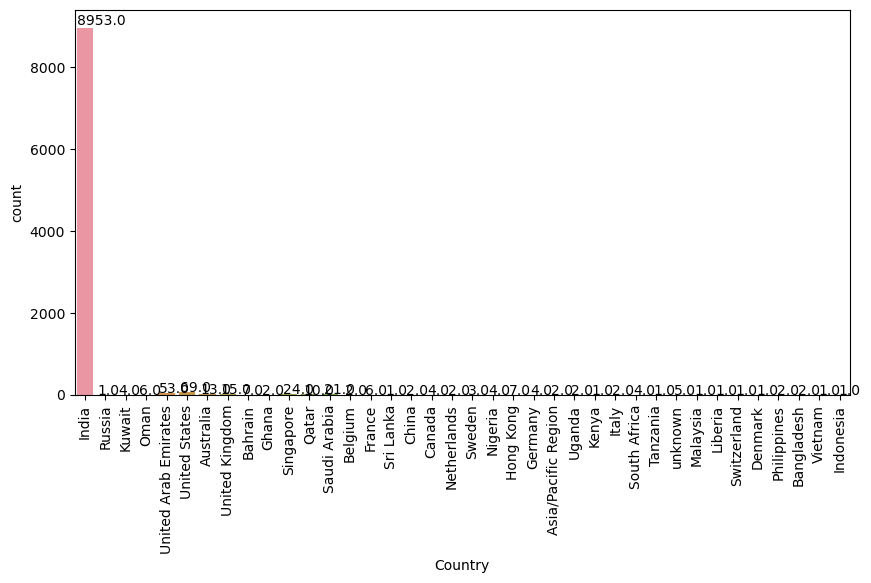

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the unique values in the 'Country' column
print(lead['Country'].unique())

# If there are non-numeric values like 'India', ensure the column is of string or categorical type
lead['Country'] = lead['Country'].astype(str)

# Plot the countplot
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=lead, x='Country')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

plt.xticks(rotation=90)
plt.show()


In [89]:
# Country is India for most values so let's impute the same in missing values.
lead['Country'] = lead['Country'].replace(np.nan, 'India')

object
['India' 'Bahrain' 'United States' 'United Kingdom' 'Qatar' 'Australia'
 'Ghana' 'Singapore' 'Saudi Arabia' 'United Arab Emirates' 'Kuwait'
 'France' 'Netherlands' 'Germany' 'Nigeria' 'Oman' 'Hong Kong' 'Tanzania'
 'Malaysia' 'Italy' 'Denmark' 'Canada' 'Indonesia' 'South Africa'
 'Bangladesh']


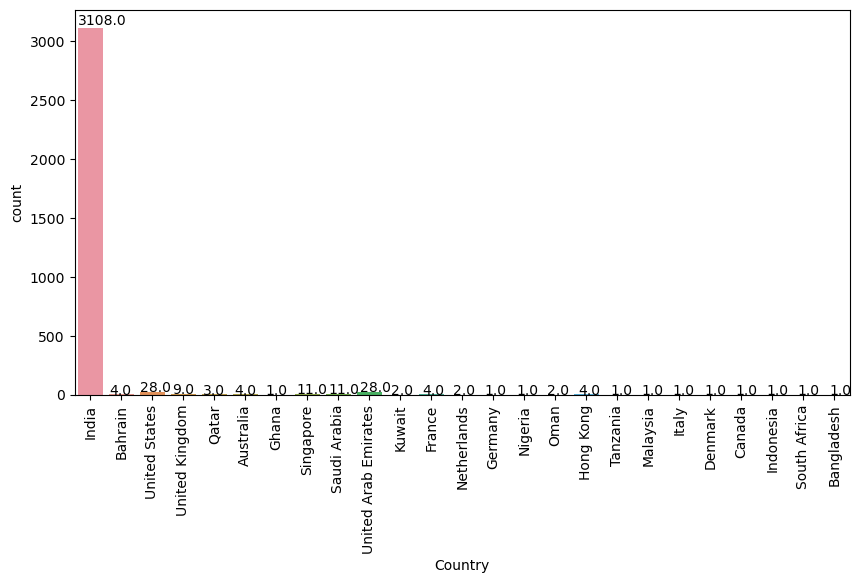

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the data type of the 'Country' column
print(lead['Country'].dtype)

# Check unique values in the 'Country' column
print(lead['Country'].unique())

# Clean the data if there are any unexpected values
# For example, remove leading and trailing spaces
lead['Country'] = lead['Country'].str.strip()

# Plot the countplot
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=lead, x='Country')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

plt.xticks(rotation=90)
plt.show()


In [92]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [93]:
lead.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [94]:
# Rest missing values are under 1.5% so we can drop these rows.
lead.dropna(inplace = True)

In [95]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [96]:
lead.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

In [97]:
data_retailed= len(lead)* 100 / len(lead_dub)
print("{} % of original rows is available for EDA".format(round(data_retailed,2)))

34.97 % of original rows is available for EDA


In [98]:
lead.shape

(3231, 29)

Now Data is free from all missing value  and we can start with the analysis 

# Exploratory Data Analytics

## Univariate Analysis

### Converted

In [99]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).

In [100]:
Converted = round((sum(lead['Converted'])/len(lead['Converted'].index))*100,2)

print("We have almost {} %  Converted rate".format(Converted))



We have almost 56.92 %  Converted rate


### Lead Origin

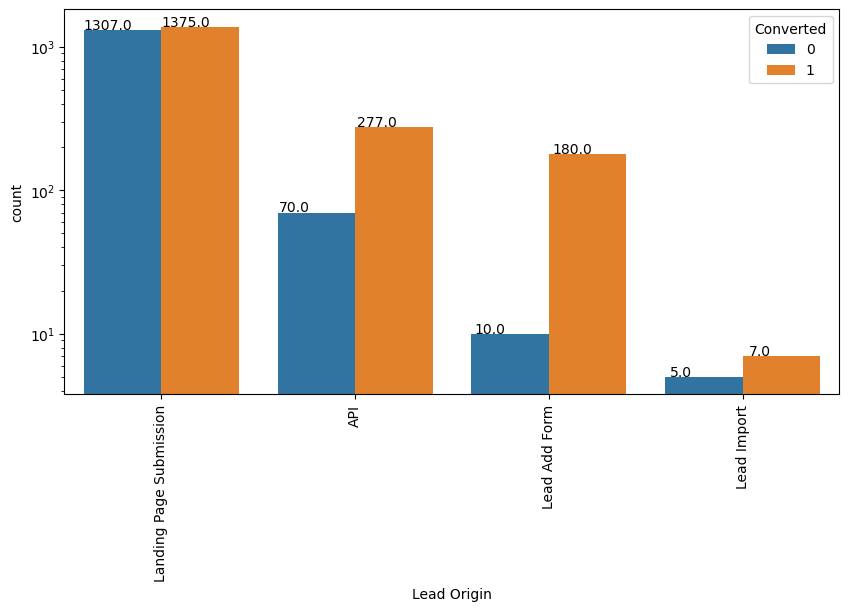

In [101]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Lead Origin", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
- Lead Add Form has more than 90% conversion rate but count of lead are not very high.
- Lead Import are very less in count.

**To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.**

## Lead Source

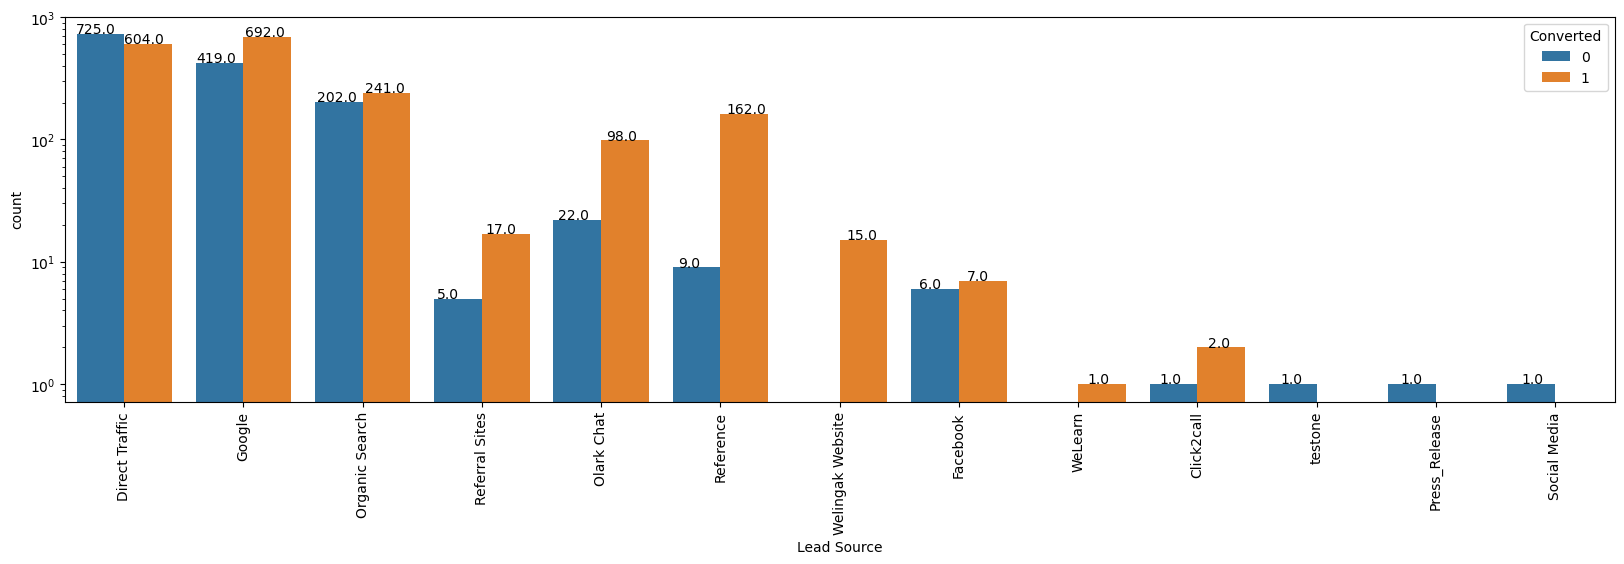

In [103]:
plt.figure(figsize = (20,5))
ax= sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [104]:
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

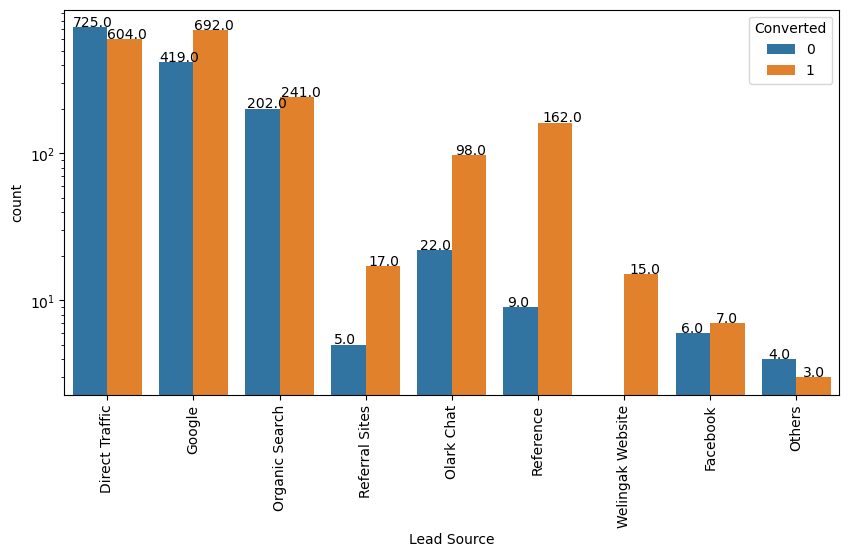

In [105]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- Google and Direct traffic generates maximum number of leads.
- Conversion Rate of reference leads and leads through welingak website is high.

**To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.**

## Do Not Email & Do Not Call

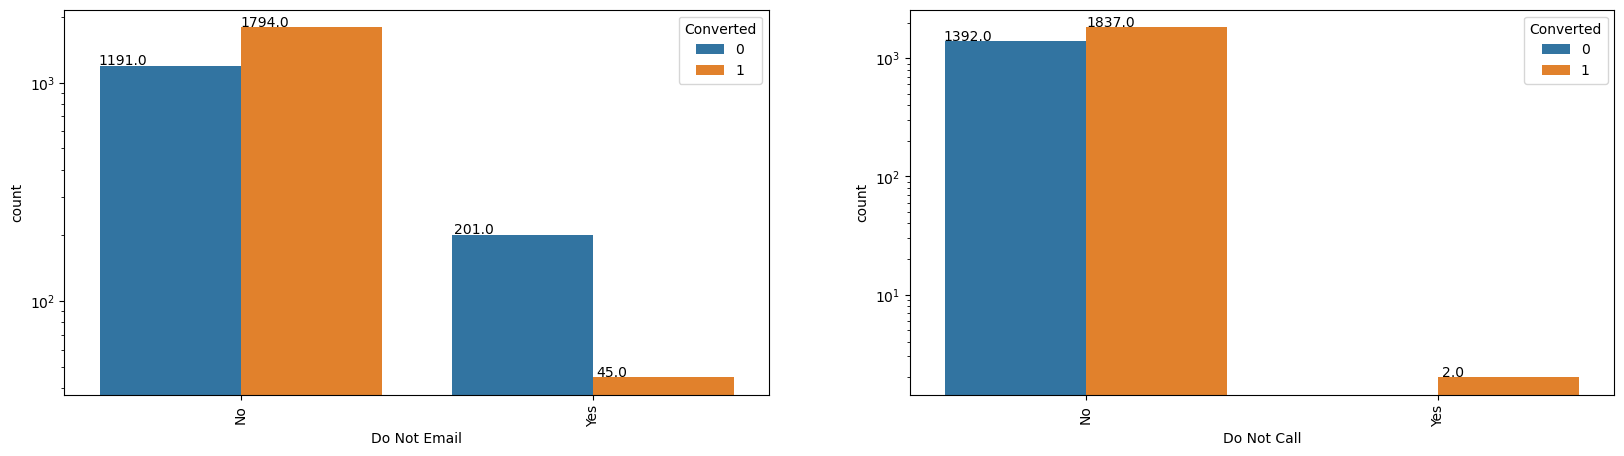

In [106]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
ax= sns.countplot(x = "Do Not Email", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.subplot(1,2,2)
ax= sns.countplot(x = "Do Not Call", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

## Total Visits

In [107]:
lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    3231.000000
mean        4.440730
std         5.784906
min         0.000000
5%          0.000000
25%         2.000000
50%         4.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        19.000000
max       251.000000
Name: TotalVisits, dtype: float64

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


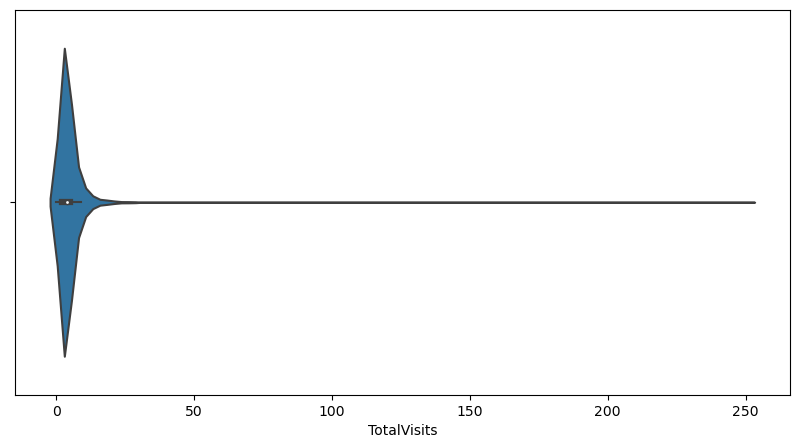

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if the DataFrame is empty
if not lead.empty:
    # Check the column names
    print(lead.columns)

    # Plot the violinplot directly without using .loc or .iloc
    plt.figure(figsize=(10, 5))
    sns.violinplot(x=lead['TotalVisits'])
    plt.show()
else:
    print("DataFrame 'lead' is empty.")


In [ ]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.

In [112]:
percentiles = lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][lead['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead['TotalVisits'][lead['TotalVisits'] >= percentiles[1]] = percentiles[1]

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


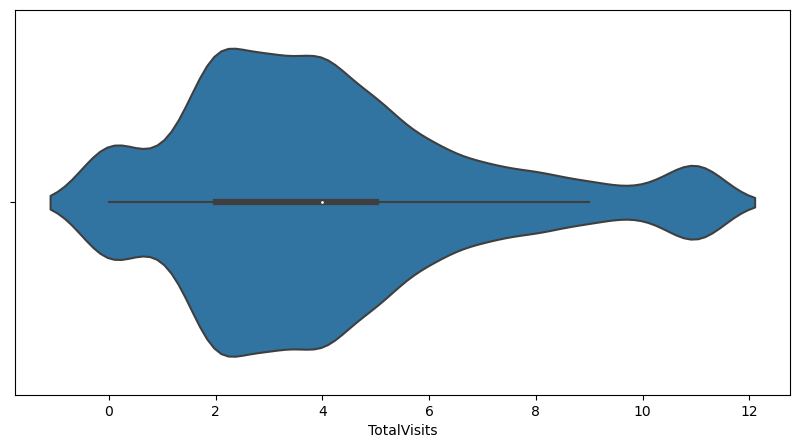

In [114]:


import matplotlib.pyplot as plt
import seaborn as sns

# Check if the DataFrame is empty
if not lead.empty:
    # Check the column names
    print(lead.columns)

    # Plot the violinplot directly without using .loc or .iloc
    plt.figure(figsize=(10, 5))
    sns.violinplot(x=lead['TotalVisits'])
    plt.show()
else:
    print("DataFrame 'lead' is empty.")


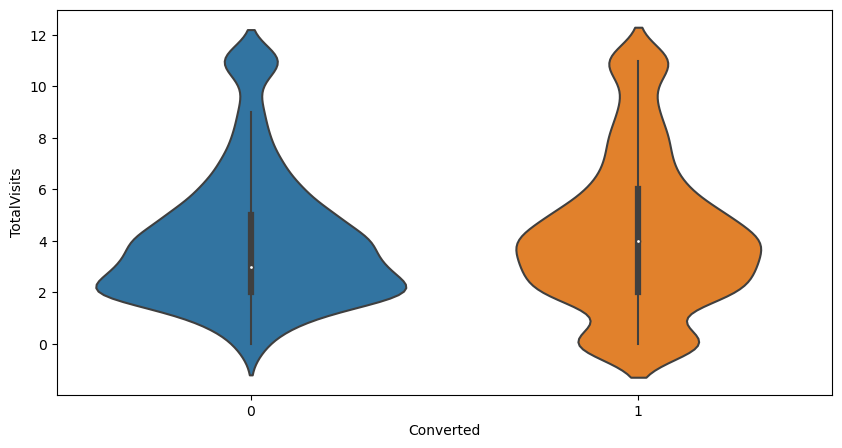

In [115]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'TotalVisits', x = 'Converted', data = lead)
plt.show()

- Median for converted and not converted leads are the same.

**Nothng conclusive can be said on the basis of Total Visits.**

## Total time spent on website

In [116]:
lead['Total Time Spent on Website'].describe()

count    3231.000000
mean      680.147942
std       571.635700
min         0.000000
25%       164.000000
50%       489.000000
75%      1178.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


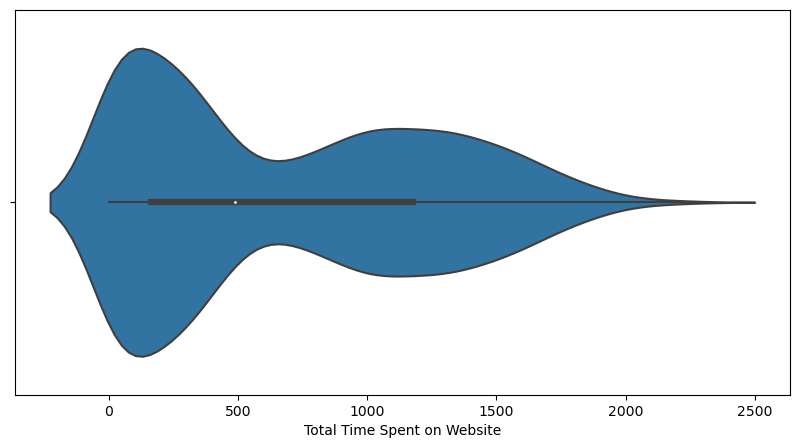

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if the DataFrame is empty
if not lead.empty:
    # Check the column names
    print(lead.columns)

    # Plot the violinplot directly without using .loc or .iloc
    plt.figure(figsize=(10, 5))
    sns.violinplot(x=lead['Total Time Spent on Website'])
    plt.show()
else:
    print("DataFrame 'lead' is empty.")


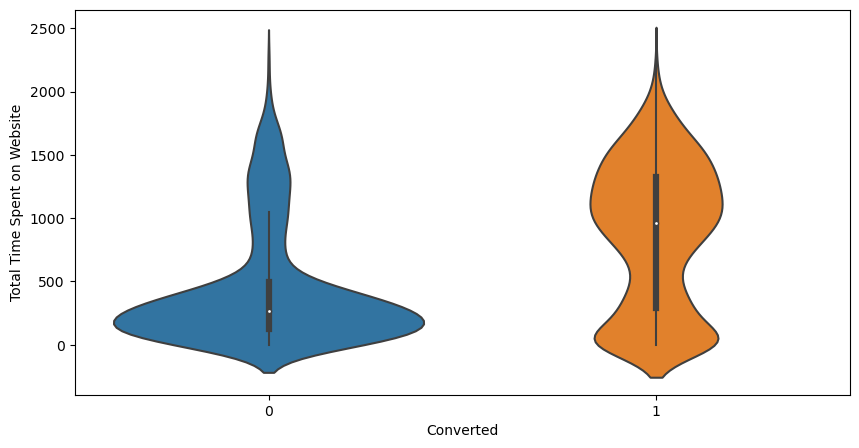

In [118]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead)
plt.show()

- Leads spending more time on the weblise are more likely to be converted.

**Website should be made more engaging to make leads spend more time.**

## Page views per visit

In [120]:
lead['Page Views Per Visit'].describe()

count    3231.000000
mean        3.019514
std         1.959448
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

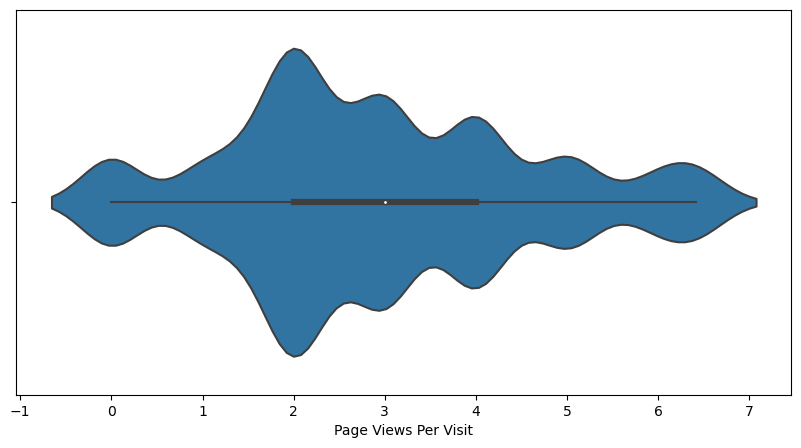

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if DataFrame is not empty and 'Page Views Per Visit' is a valid column name
if not lead.empty and 'Page Views Per Visit' in lead.columns:
    # Plot the violinplot using the column name directly
    plt.figure(figsize=(10, 5))
    sns.violinplot(x='Page Views Per Visit', data=lead)
    plt.show()
else:
    if lead.empty:
        print("DataFrame 'lead' is empty.")
    else:
        print("Column 'Page Views Per Visit' not found in DataFrame.")


In [122]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.

In [128]:
percentiles = lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

In [129]:
plt.figure(figsize = (10,5))
sns.violinplot(lead['Page Views Per Visit'])
plt.show()

KeyError: 0

<Figure size 1000x500 with 0 Axes>

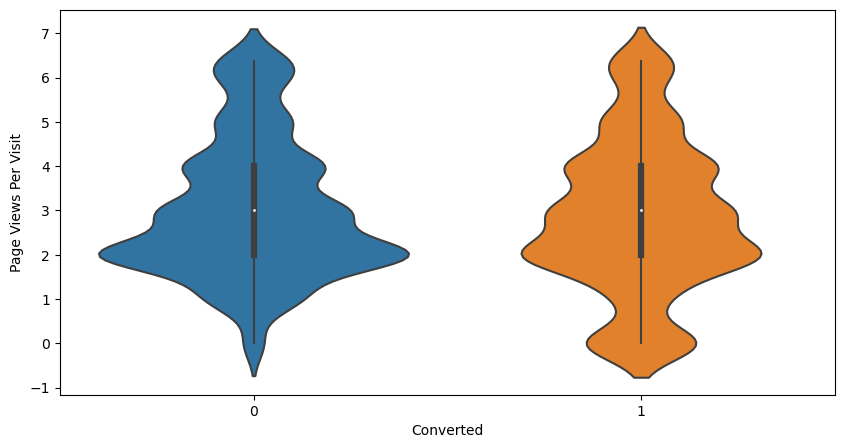

In [130]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Page Views Per Visit', x = 'Converted', data = lead)
plt.show()

- Median for converted and unconverted leads is the same.

**Nothing can be said specifically for lead conversion from Page Views Per Visit**

## Last Activity

In [131]:
lead['Last Activity'].describe()

count             3231
unique              16
top       Email Opened
freq              1266
Name: Last Activity, dtype: object

In [132]:
lead['Last Activity'].value_counts()

Last Activity
Email Opened                    1266
SMS Sent                        1192
Page Visited on Website          243
Converted to Lead                129
Email Bounced                     98
Email Link Clicked                80
Olark Chat Conversation           69
Unreachable                       54
Form Submitted on Website         53
Unsubscribed                      22
Had a Phone Conversation          17
Approached upfront                 3
Email Received                     2
Visited Booth in Tradeshow         1
View in browser link Clicked       1
Email Marked Spam                  1
Name: count, dtype: int64

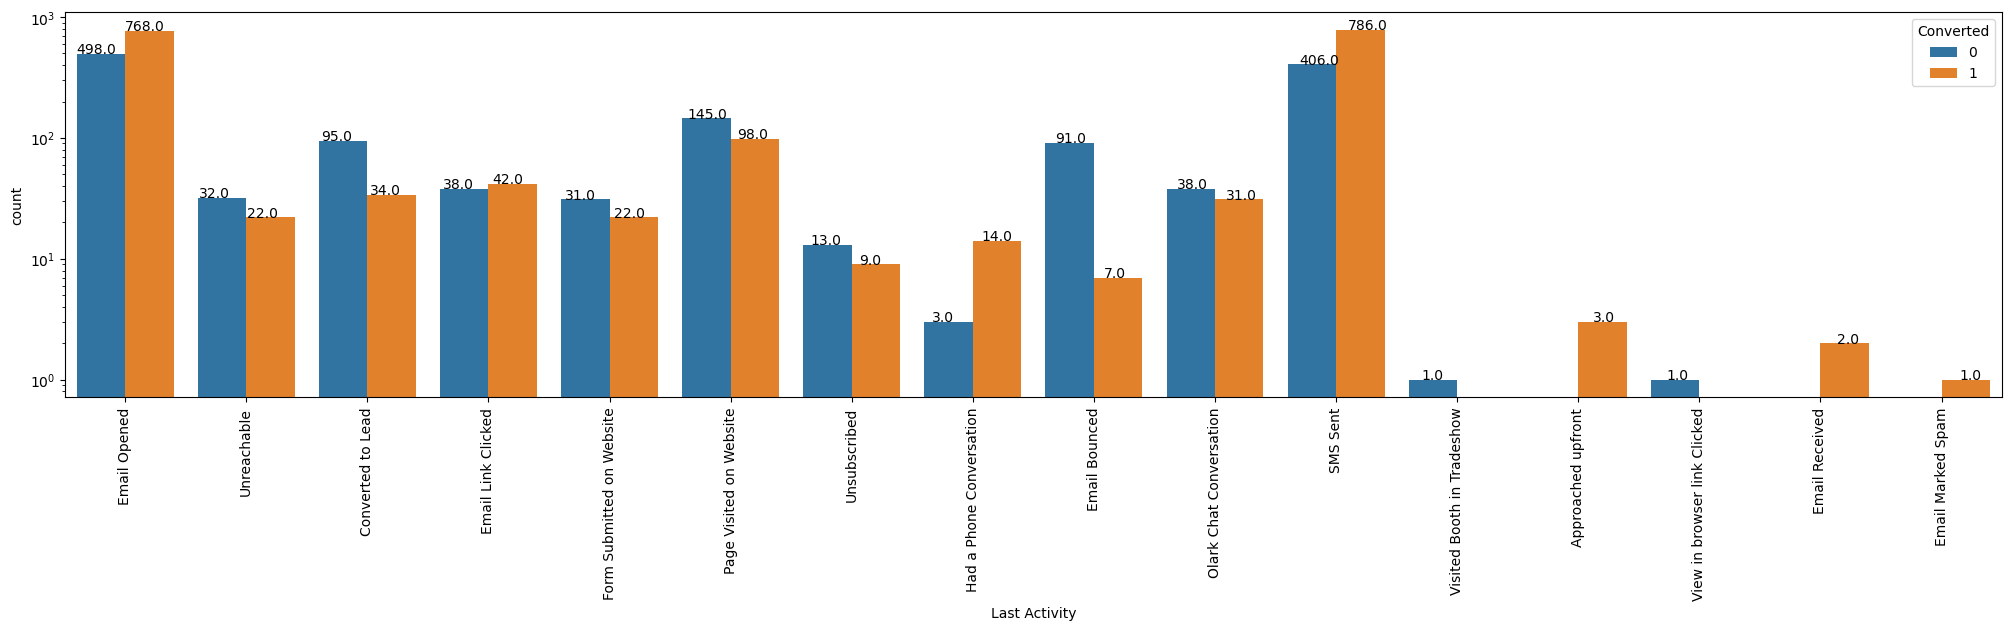

In [133]:
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Last Activity", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [134]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'],
                                                      'Other_Activity')

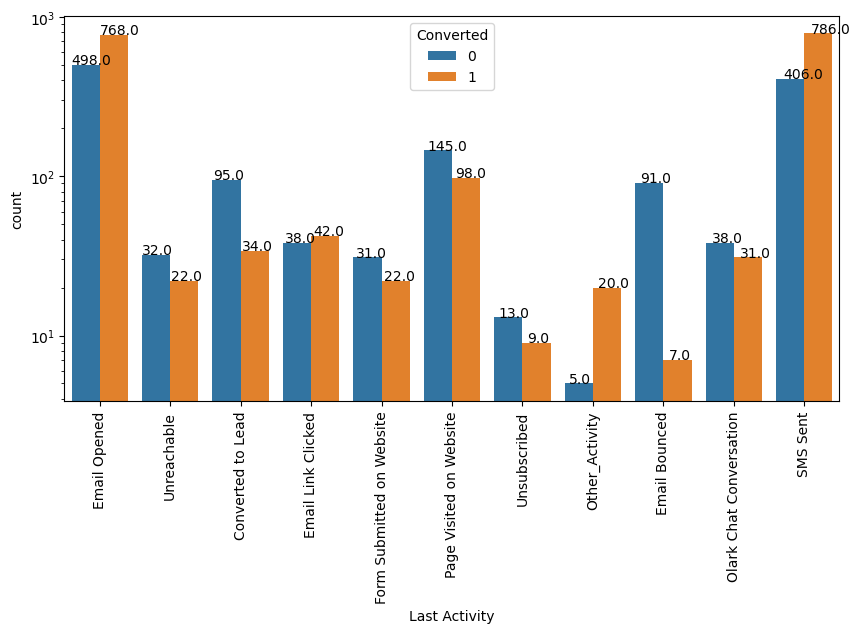

In [135]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Last Activity", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- Most of the lead have their Email opened as their last activity.
- Conversion rate for leads with last activity as SMS Sent is almost 62%.

## Country

In [136]:
lead.Country.describe()

count      3231
unique       25
top       India
freq       3108
Name: Country, dtype: object

In [137]:
lead.Country.value_counts()

Country
India                   3108
United States             28
United Arab Emirates      28
Singapore                 11
Saudi Arabia              11
United Kingdom             9
Bahrain                    4
Australia                  4
Hong Kong                  4
France                     4
Qatar                      3
Oman                       2
Netherlands                2
Kuwait                     2
Germany                    1
Nigeria                    1
Ghana                      1
Tanzania                   1
Malaysia                   1
Italy                      1
Denmark                    1
Canada                     1
Indonesia                  1
South Africa               1
Bangladesh                 1
Name: count, dtype: int64

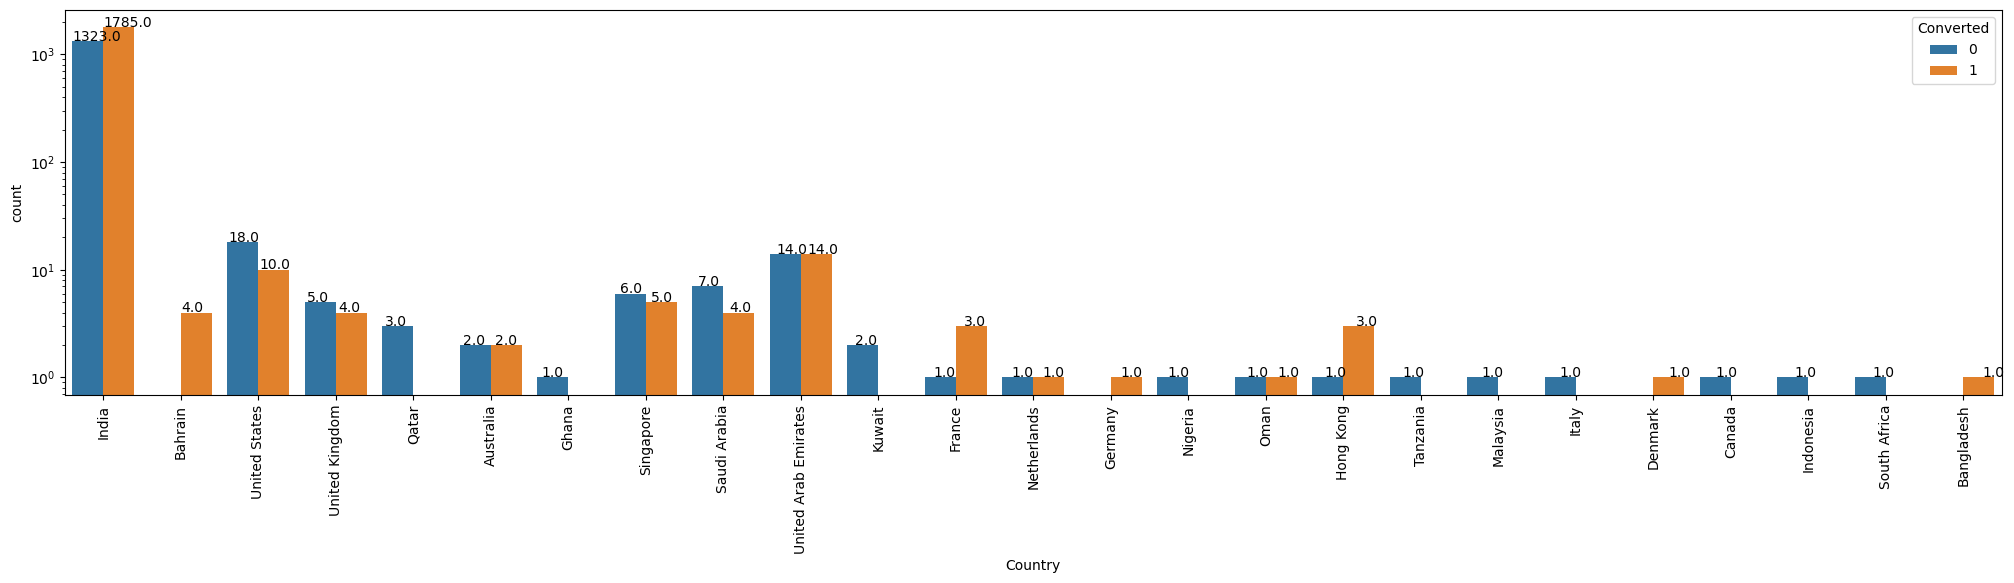

In [138]:
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Country", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- Most values are 'India' , we can tell core business is coming from India market 

**They have potential to make business from US, Middle East & Europe**

## Specialization

In [139]:
lead.Specialization.describe()

count                   3231
unique                    19
top       Finance Management
freq                     538
Name: Specialization, dtype: object

In [140]:
lead.Specialization.value_counts()

Specialization
Finance Management                   538
Human Resource Management            443
Marketing Management                 437
Operations Management                251
Business Administration              216
IT Projects Management               202
Supply Chain Management              189
Banking, Investment And Insurance    181
Media and Advertising                109
Travel and Tourism                   109
Others                               107
International Business                97
Healthcare Management                 88
Hospitality Management                66
Retail Management                     57
E-COMMERCE                            52
Rural and Agribusiness                38
E-Business                            32
Services Excellence                   19
Name: count, dtype: int64

In [141]:
lead['Specialization'] = lead['Specialization'].replace(['Others'], 'Other_Specialization')

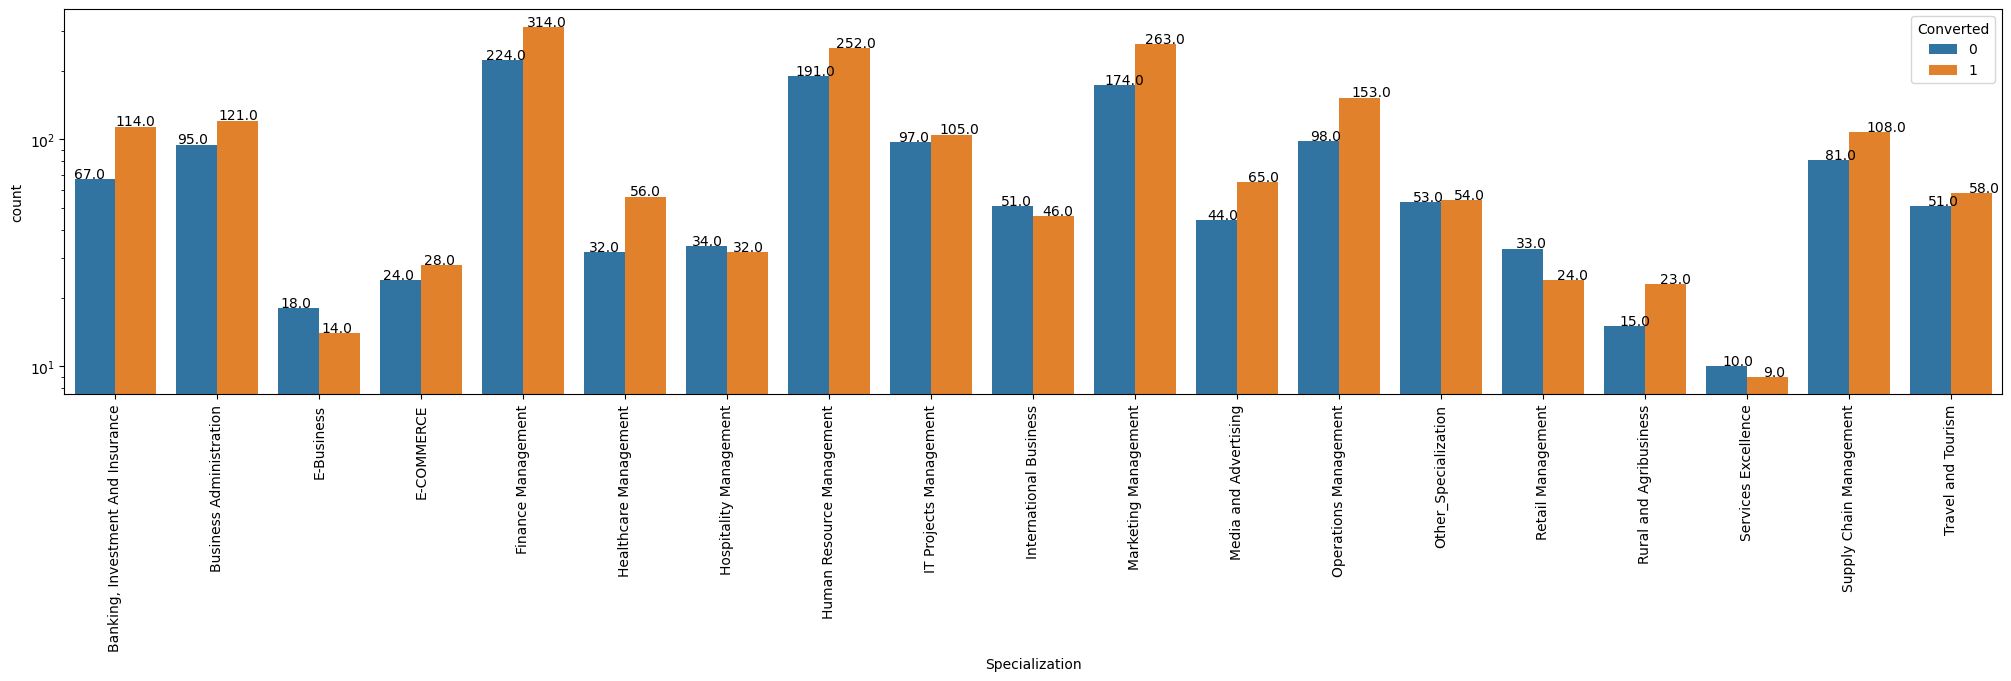

In [142]:
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Specialization", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- Focus should be more on the Specialization with high conversion rate.

## Occupation

In [143]:
lead['What is your current occupation'].describe()

count           3231
unique             6
top       Unemployed
freq            2678
Name: What is your current occupation, dtype: object

In [144]:
lead['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              2678
Working Professional     412
Student                  120
Other                     10
Housewife                  9
Businessman                2
Name: count, dtype: int64

In [145]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(['Other'], 'Other_Occupation')

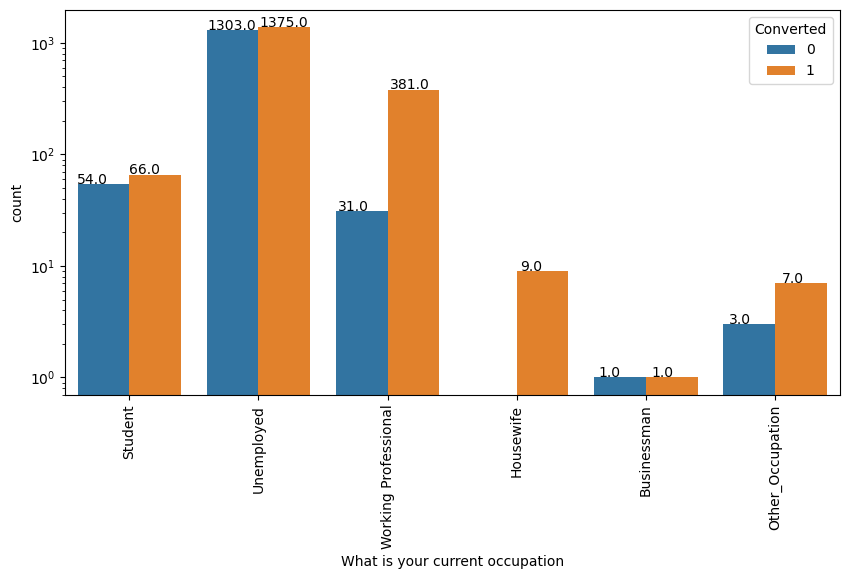

In [146]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in numbers but has around 30-35% conversion rate.

## What matters most to you in choosing a course

In [147]:
lead['What matters most to you in choosing a course'].describe()

count                        3231
unique                          3
top       Better Career Prospects
freq                         3229
Name: What matters most to you in choosing a course, dtype: object

In [148]:
lead['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      3229
Flexibility & Convenience       1
Other                           1
Name: count, dtype: int64

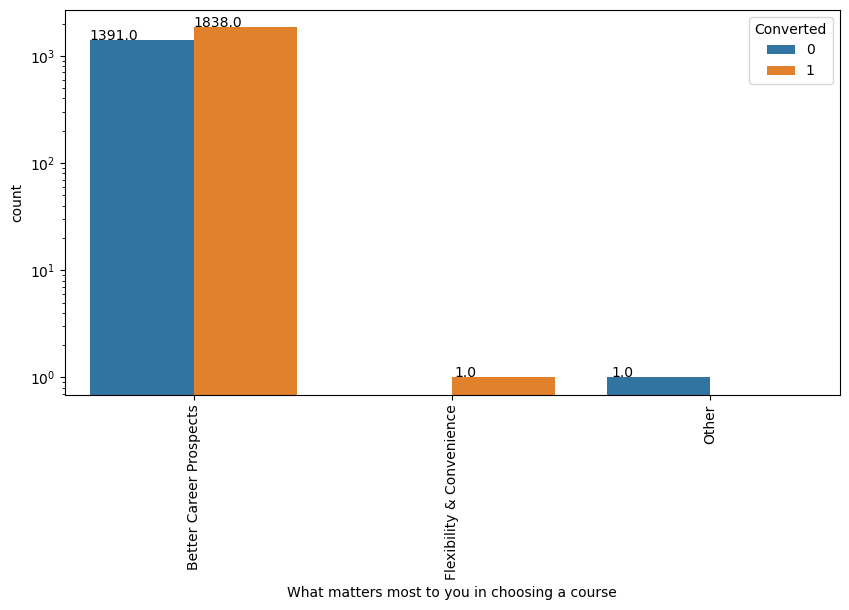

In [149]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- Most entries are 'Better Career Prospects'. No Inference can be drawn with this parameter.

## Search

In [150]:
lead.Search.describe()

count     3231
unique       2
top         No
freq      3226
Name: Search, dtype: object

In [151]:
lead.Search.value_counts()

Search
No     3226
Yes       5
Name: count, dtype: int64

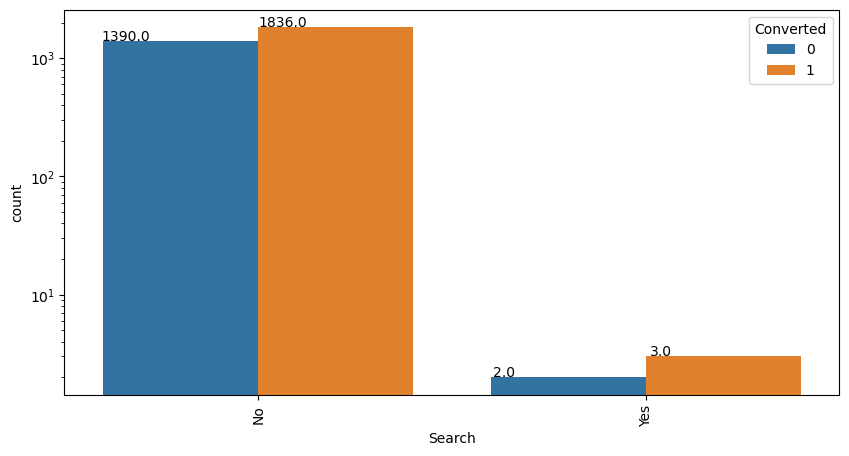

In [152]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Search", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

## Magazine

In [153]:
lead.Magazine.describe()

count     3231
unique       1
top         No
freq      3231
Name: Magazine, dtype: object

In [154]:
lead.Magazine.value_counts()

Magazine
No    3231
Name: count, dtype: int64

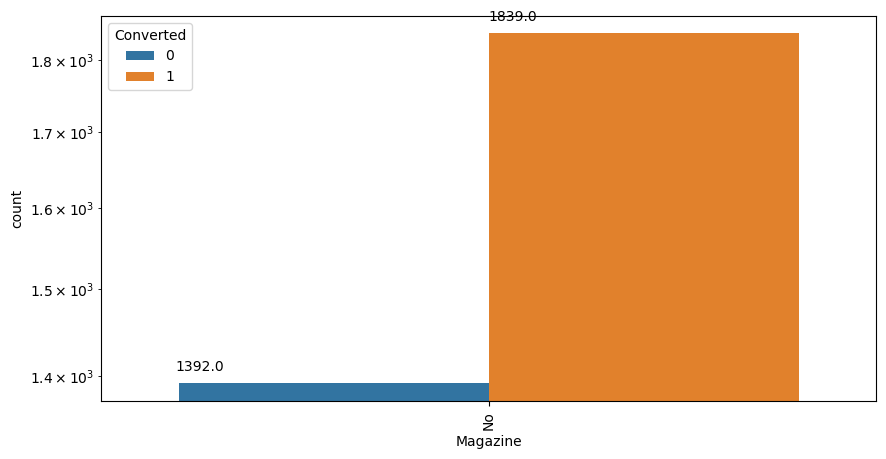

In [155]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Magazine", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- All entries are 'No'. No Inference can be drawn with this parameter.

## Newspaper Article

In [156]:
lead['Newspaper Article'].describe()

count     3231
unique       1
top         No
freq      3231
Name: Newspaper Article, dtype: object

In [157]:
lead['Newspaper Article'].value_counts()

Newspaper Article
No    3231
Name: count, dtype: int64

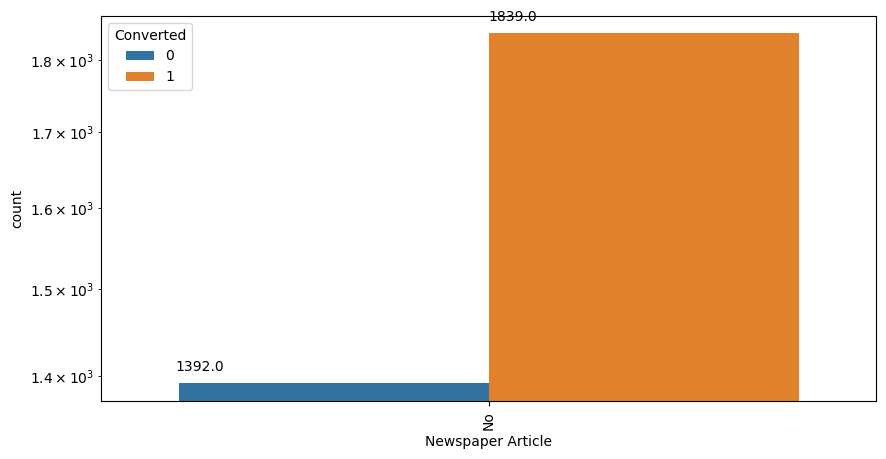

In [158]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

## X Education Forums

In [159]:
lead['X Education Forums'].describe()

count     3231
unique       1
top         No
freq      3231
Name: X Education Forums, dtype: object

In [160]:
lead['X Education Forums'].value_counts()

X Education Forums
No    3231
Name: count, dtype: int64

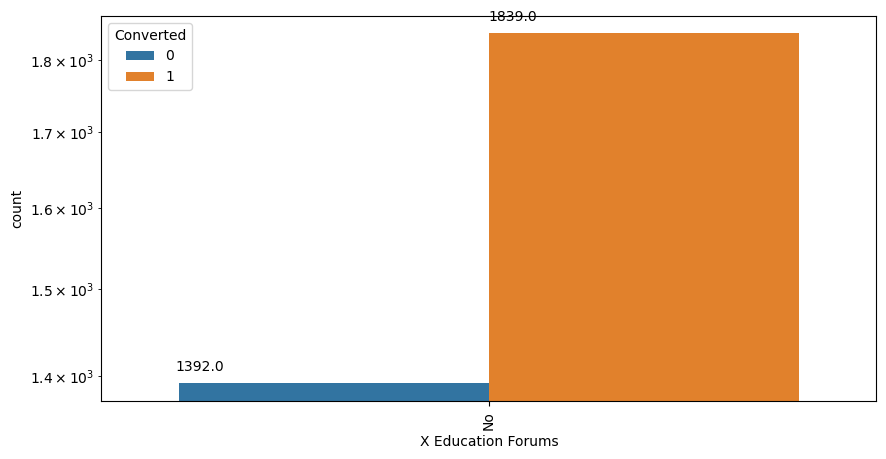

In [161]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "X Education Forums", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

## Newspaper

In [162]:
lead['Newspaper'].describe()

count     3231
unique       1
top         No
freq      3231
Name: Newspaper, dtype: object

In [163]:
lead['Newspaper'].value_counts()

Newspaper
No    3231
Name: count, dtype: int64

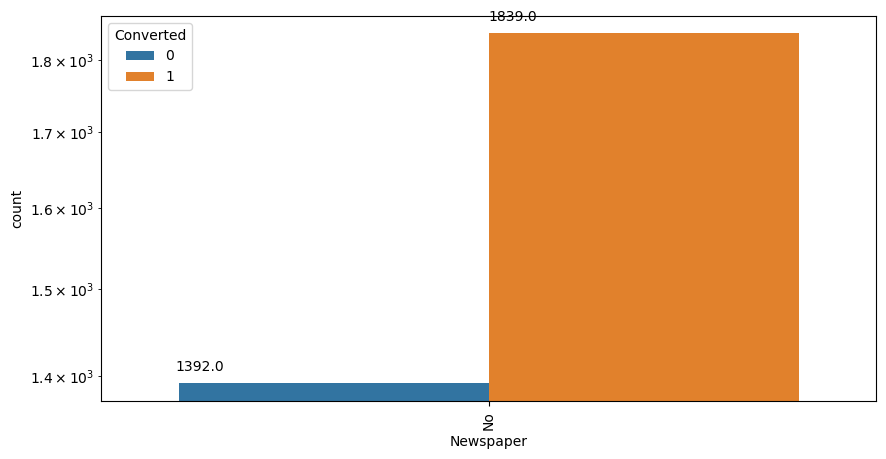

In [164]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Newspaper", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

## Digital Advertisement

In [165]:
lead['Digital Advertisement'].describe()

count     3231
unique       1
top         No
freq      3231
Name: Digital Advertisement, dtype: object

In [166]:
lead['Digital Advertisement'].value_counts()

Digital Advertisement
No    3231
Name: count, dtype: int64

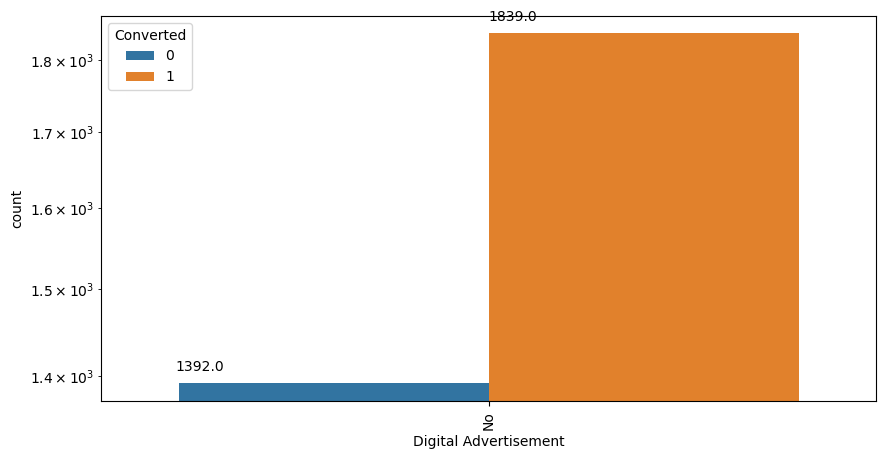

In [167]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

## Through Recommendations

In [168]:
lead['Through Recommendations'].describe()

count     3231
unique       2
top         No
freq      3226
Name: Through Recommendations, dtype: object

In [169]:
lead['Through Recommendations'].value_counts()

Through Recommendations
No     3226
Yes       5
Name: count, dtype: int64

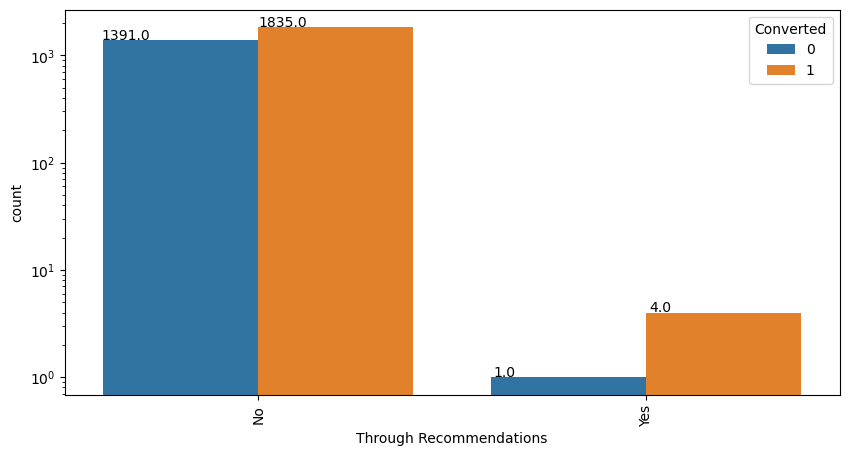

In [170]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- Most entries are 'No'. No Inference can be drawn with this parameter.

## Receive More Updates About Our Courses

In [171]:
lead['Receive More Updates About Our Courses'].describe()

count     3231
unique       1
top         No
freq      3231
Name: Receive More Updates About Our Courses, dtype: object

In [172]:
lead['Receive More Updates About Our Courses'].value_counts()

Receive More Updates About Our Courses
No    3231
Name: count, dtype: int64

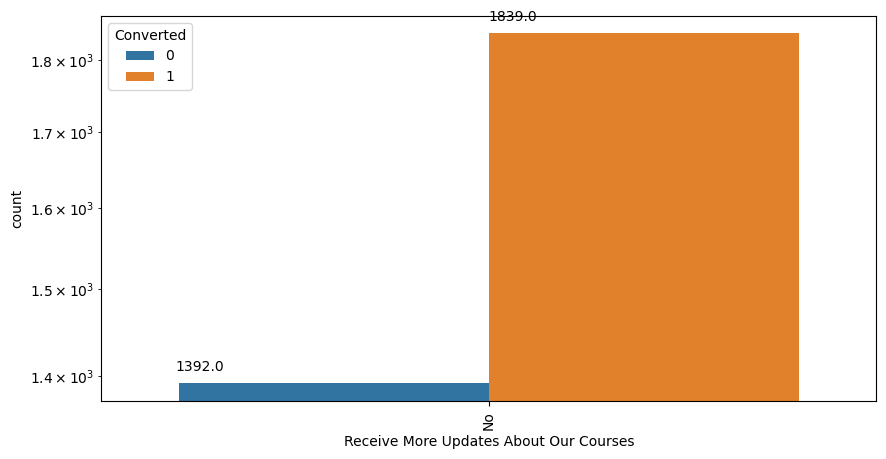

In [173]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- All entries are 'No'. No Inference can be drawn with this parameter.

## Tags

In [174]:
lead.Tags.describe()

count                                    3231
unique                                     25
top       Will revert after reading the email
freq                                     1482
Name: Tags, dtype: object

In [175]:
lead.Tags.value_counts()

Tags
Will revert after reading the email                  1482
Ringing                                               486
Already a student                                     224
Closed by Horizzon                                    187
Interested in other courses                           145
Busy                                                  140
switched off                                          128
Not doing further education                            95
Lost to EINS                                           64
Graduation in progress                                 54
Interested  in full time MBA                           50
invalid number                                         38
wrong number given                                     30
Diploma holder (Not Eligible)                          28
nan                                                    25
number not provided                                    15
opp hangup                                             14
Want to t

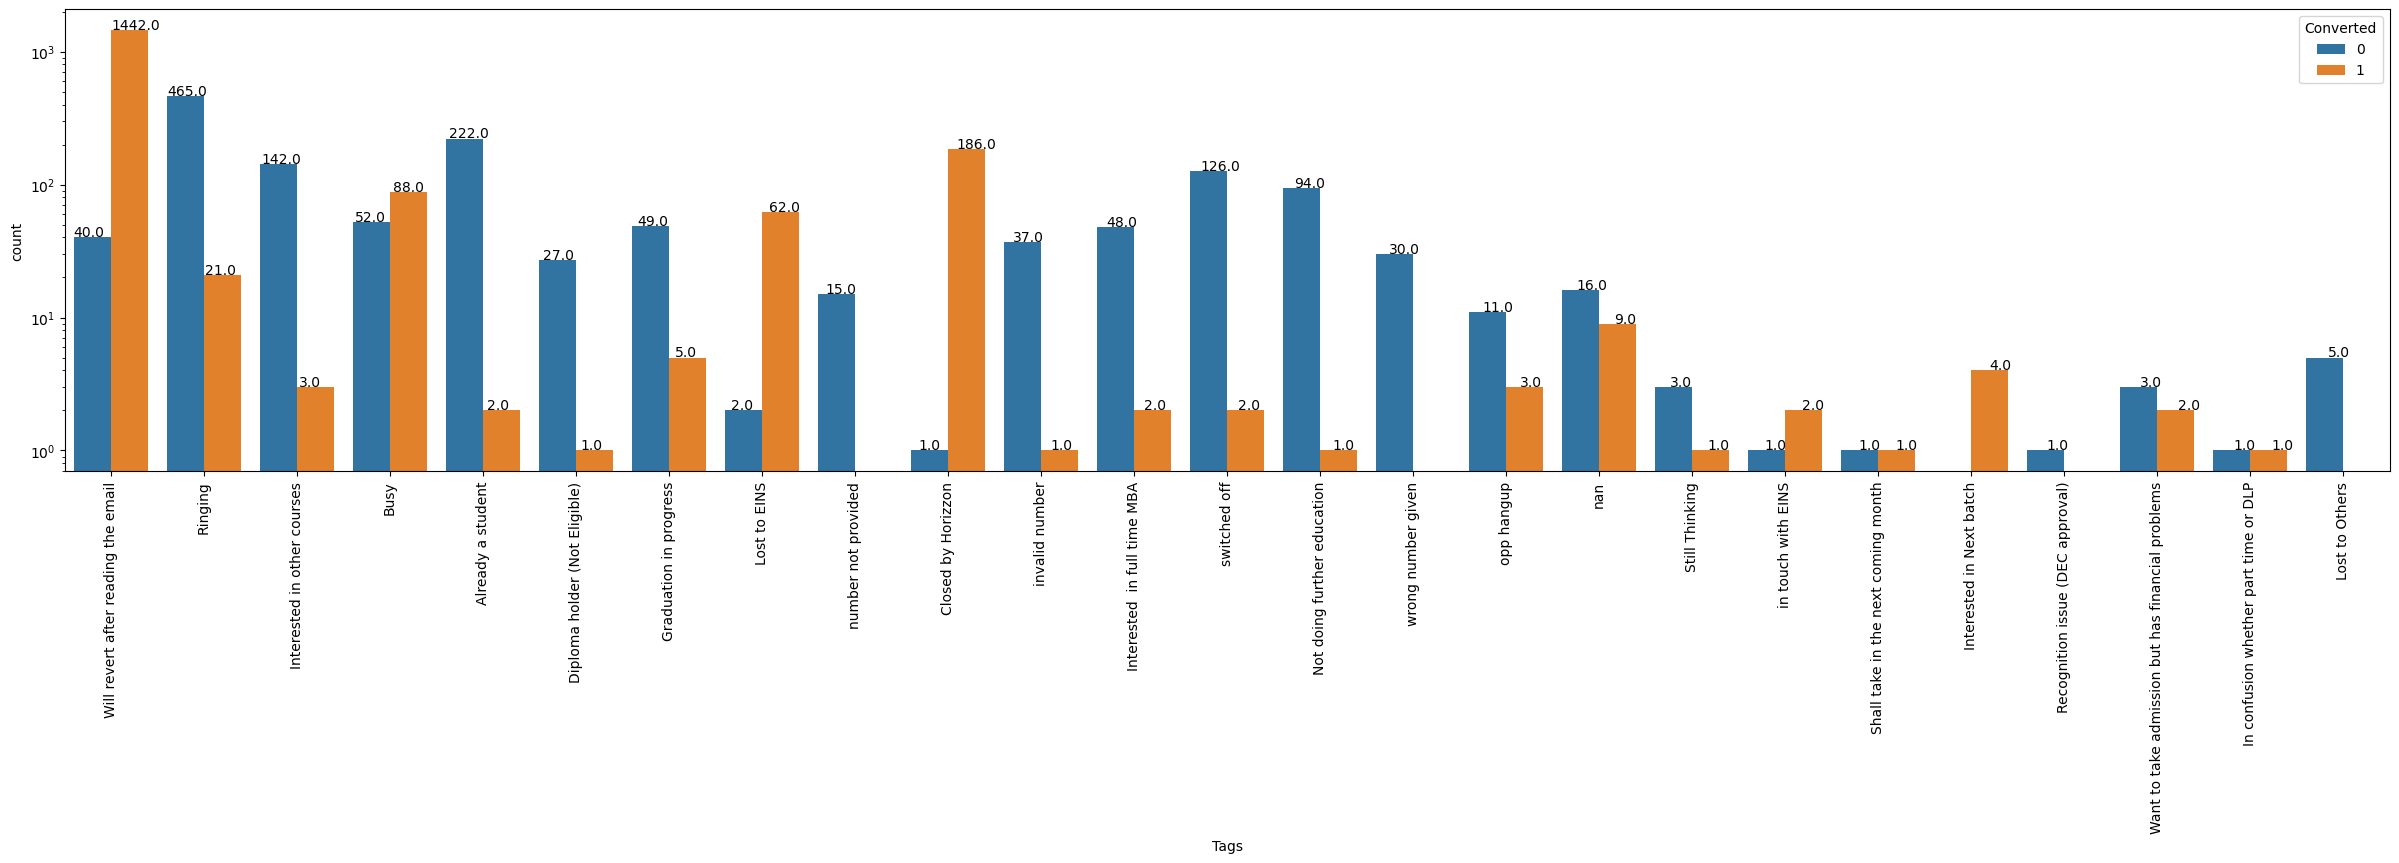

In [176]:
plt.figure(figsize = (30,6))
ax= sns.countplot(x = "Tags", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [177]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
lead['Tags'] = lead['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

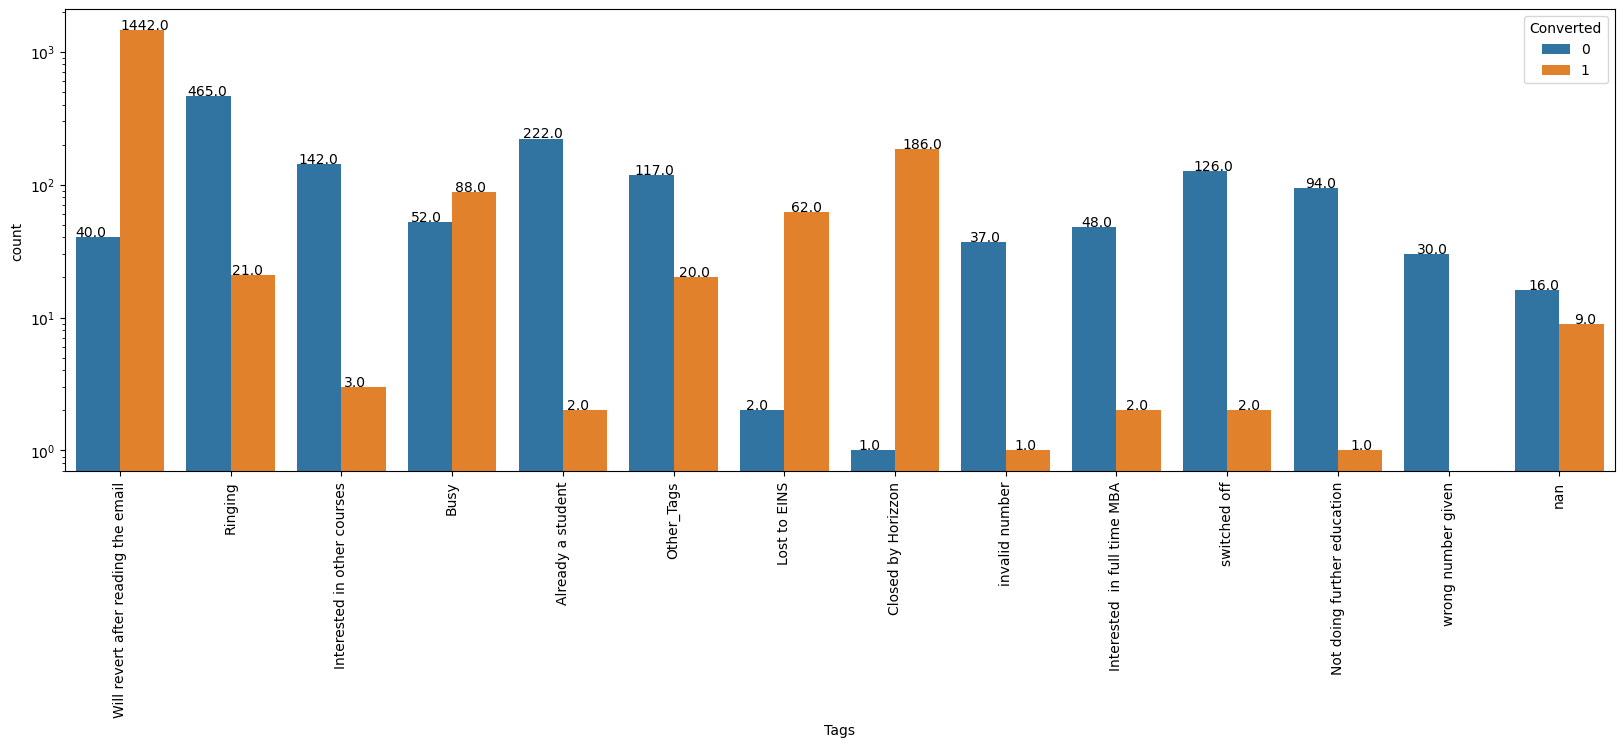

In [178]:
plt.figure(figsize = (20,6))
ax= sns.countplot(x = "Tags", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- 'Will revert after reading the email' is a mixed emotion, it may be Interested or Not Interested. Depend upon the mood of customer, their requirement & content of the email, Lead can be conveted into a customer.
- 'Closed by Horizon', 'Lost to EINS' are positive tag for Lead
- 'Invalid number', 'wrong number given','Not doing further education'& 'Interested  in full time MBA' are negative tag 

## Lead Quality

In [179]:
lead['Lead Quality'].describe()

count         3231
unique           5
top       Might be
freq          1004
Name: Lead Quality, dtype: object

In [180]:
lead['Lead Quality'].value_counts()

Lead Quality
Might be             1004
Not Sure              812
Low in Relevance      513
High in Relevance     509
Worst                 393
Name: count, dtype: int64

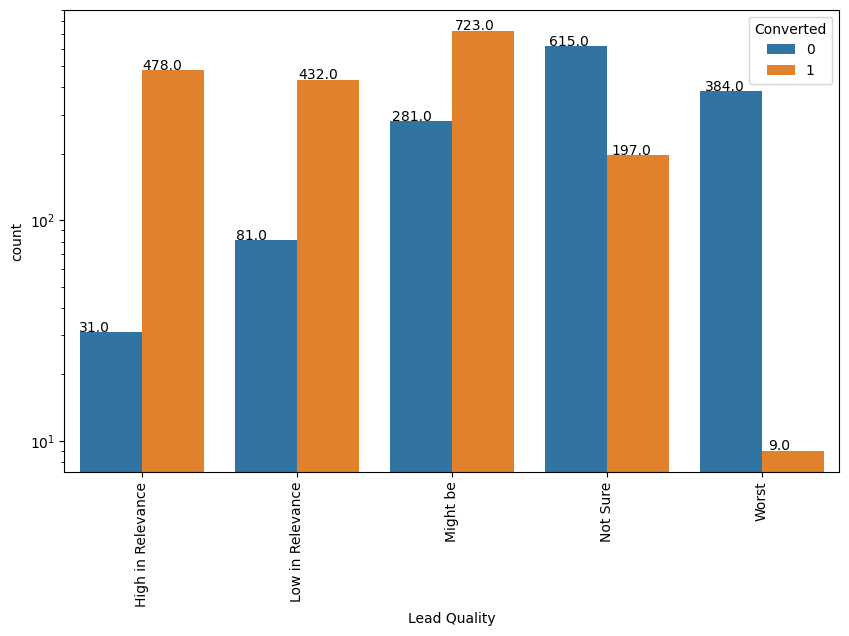

In [181]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = "Lead Quality", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- 'Not Sure' is a mixed emotion, it may be Interested or Not Interested. Depend upon the mood of customer,their requirement & content of the communication, Lead can be conveted into a customer.
- 'Worst' Lead Quality brings less business 

## Update me on Supply Chain Content

In [182]:
lead['Update me on Supply Chain Content'].describe()

count     3231
unique       1
top         No
freq      3231
Name: Update me on Supply Chain Content, dtype: object

In [183]:
lead['Update me on Supply Chain Content'].value_counts()

Update me on Supply Chain Content
No    3231
Name: count, dtype: int64

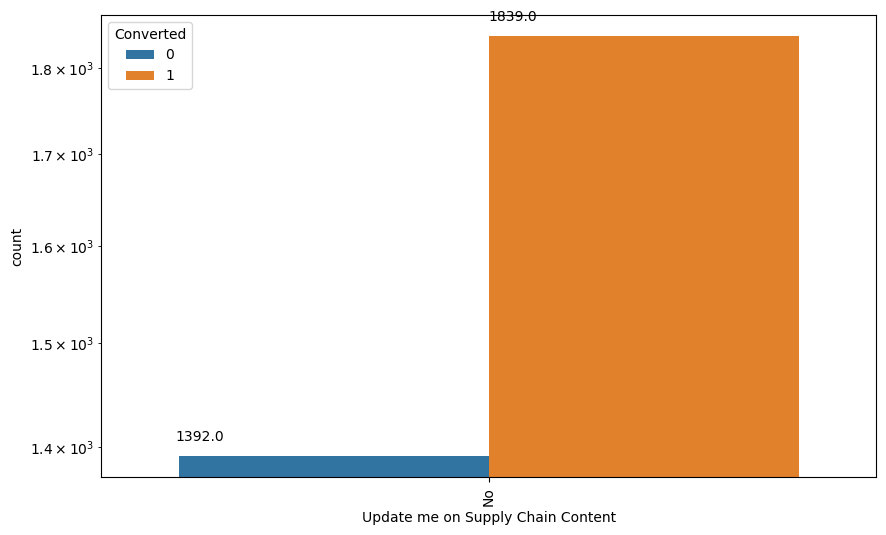

In [184]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- All entries are 'No'. No Inference can be drawn with this parameter.

## Get updates on DM Content

In [185]:
lead['Get updates on DM Content'].describe()

count     3231
unique       1
top         No
freq      3231
Name: Get updates on DM Content, dtype: object

In [186]:
lead['Get updates on DM Content'].value_counts()

Get updates on DM Content
No    3231
Name: count, dtype: int64

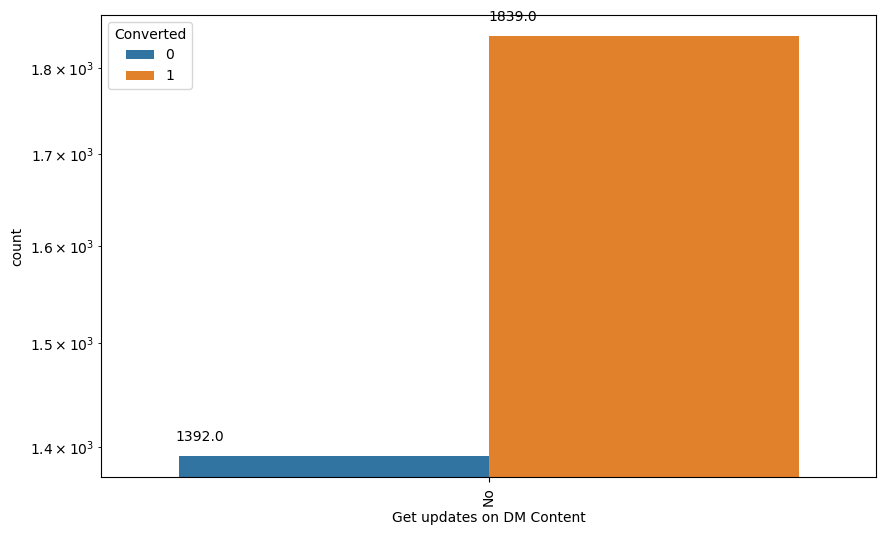

In [187]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- All entries are 'No'. No Inference can be drawn with this parameter.

## I agree to pay the amount through cheque

In [188]:
lead['I agree to pay the amount through cheque'].describe()

count     3231
unique       1
top         No
freq      3231
Name: I agree to pay the amount through cheque, dtype: object

In [189]:
lead['I agree to pay the amount through cheque'].value_counts()

I agree to pay the amount through cheque
No    3231
Name: count, dtype: int64

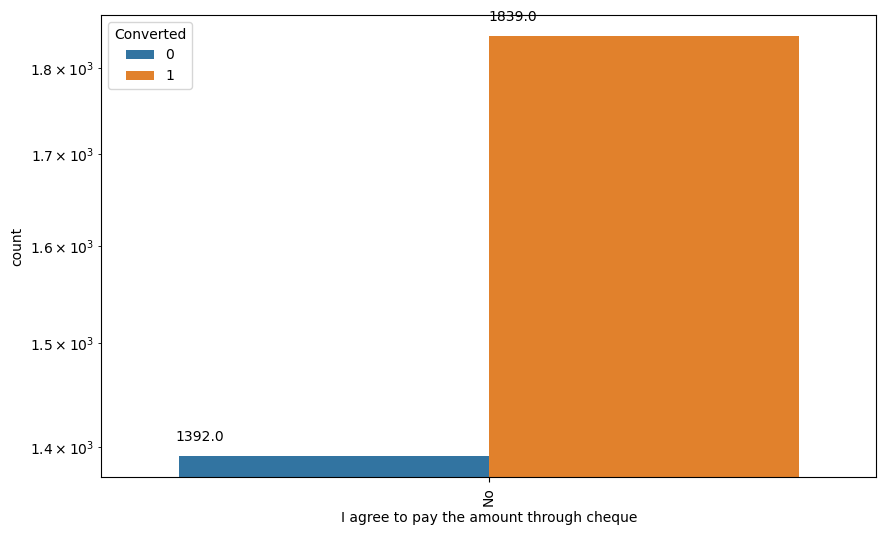

In [190]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

All entries are 'No'. No Inference can be drawn with this parameter.

## A free copy of Mastering The Interview

In [191]:
lead['A free copy of Mastering The Interview'].describe()

count     3231
unique       2
top        Yes
freq      1617
Name: A free copy of Mastering The Interview, dtype: object

In [192]:
lead['A free copy of Mastering The Interview'].value_counts()

A free copy of Mastering The Interview
Yes    1617
No     1614
Name: count, dtype: int64

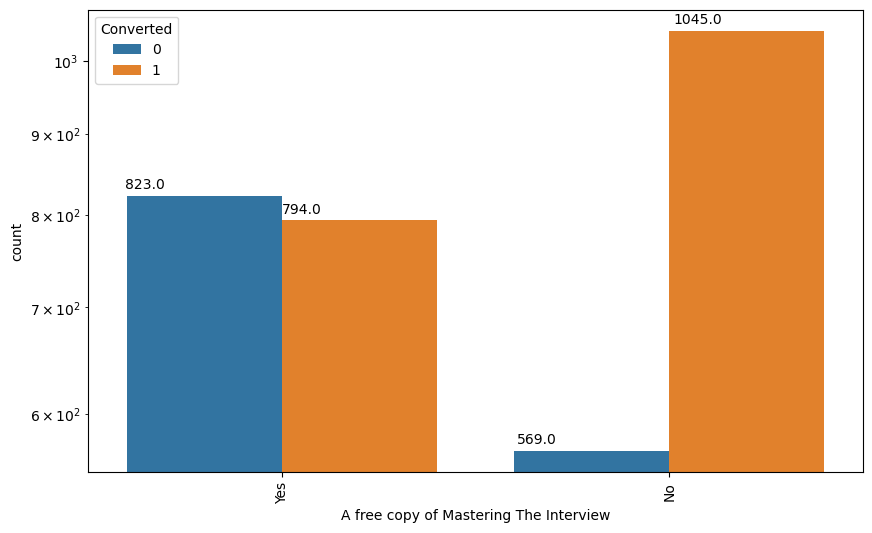

In [193]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- 'A free copy of Mastering The Interview' doesn't play role in decision making. 

## City

In [194]:
lead.City.describe()

count       3231
unique         6
top       Mumbai
freq        1870
Name: City, dtype: object

In [195]:
lead.City.value_counts()

City
Mumbai                         1870
Thane & Outskirts               454
Other Cities                    373
Other Cities of Maharashtra     270
Other Metro Cities              220
Tier II Cities                   44
Name: count, dtype: int64

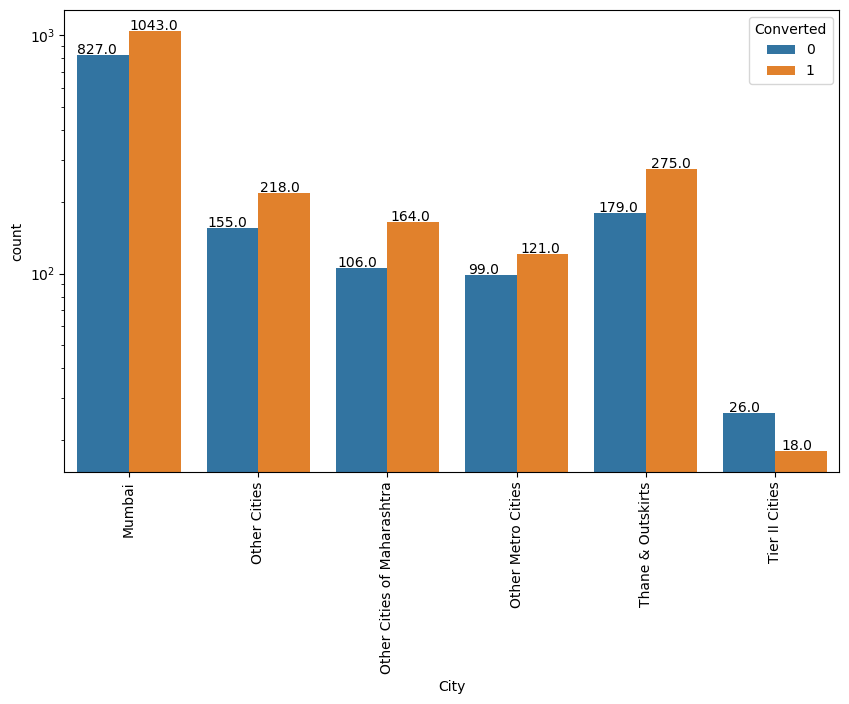

In [196]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = "City", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- Most leads are from mumbai with around 30% conversion rate.

## Last Notable Activity

In [197]:
lead['Last Notable Activity'].describe()

count             3231
unique              14
top       Email Opened
freq              1059
Name: Last Notable Activity, dtype: object

In [198]:
lead['Last Notable Activity'].value_counts()

Last Notable Activity
Email Opened                    1059
SMS Sent                        1032
Modified                         882
Page Visited on Website          120
Email Link Clicked                55
Unsubscribed                      18
Email Bounced                     18
Unreachable                       17
Olark Chat Conversation           15
Had a Phone Conversation          11
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Email Marked Spam                  1
Name: count, dtype: int64

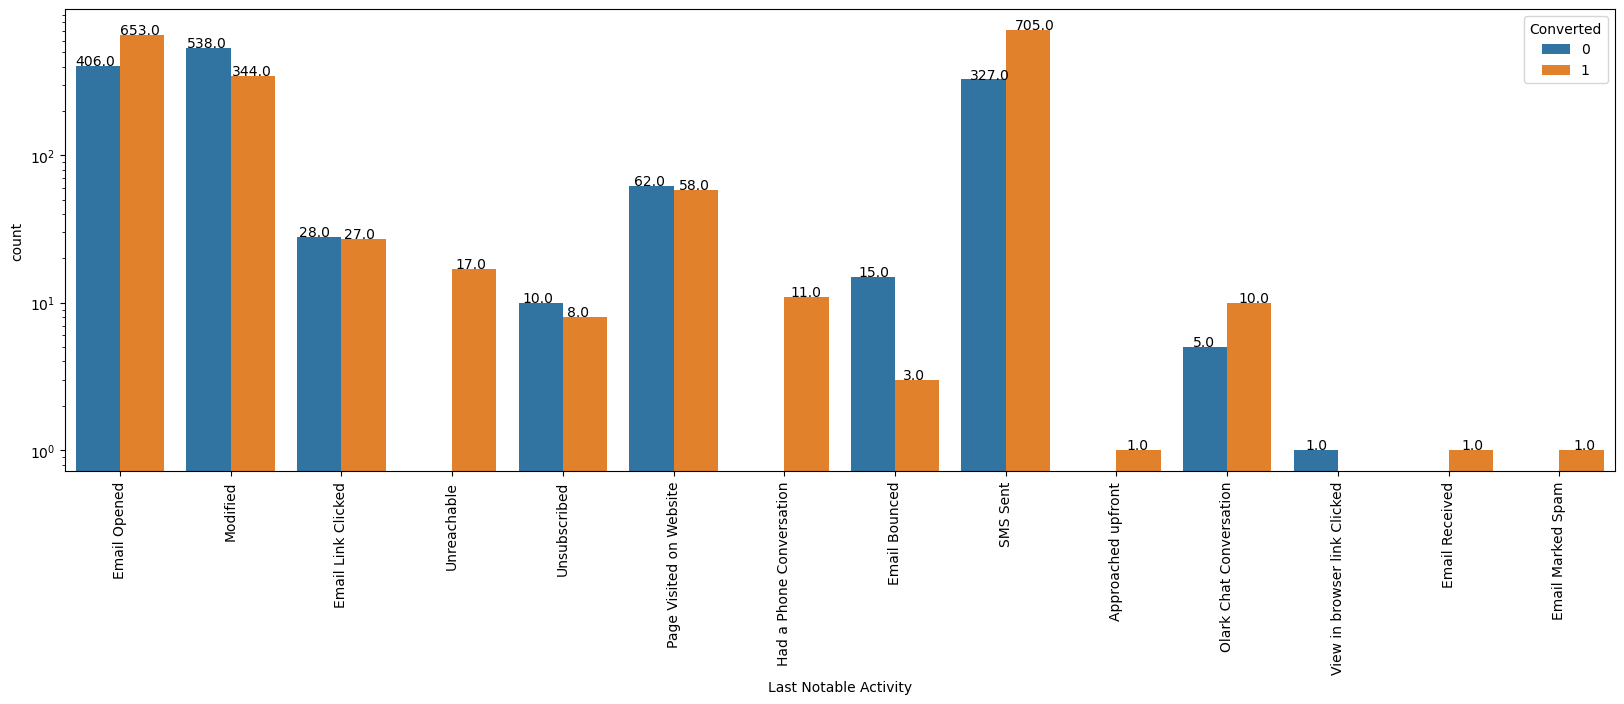

In [199]:
plt.figure(figsize = (20,6))
ax= sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- 'SMS Sent' is strong symbol for positive lead 

## **Results**


Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for frther analysis

In [203]:
lead = lead.drop(['What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Country'], axis=1)


In [204]:
print("Original Columns {} % Retained".format(round((100* len(lead.columns)/len(lead_dub.columns)),2)))

Original Columns 40.54 % Retained


In [205]:
print("Original Data {} % Retained".format(round((len(lead) * 
                                                     len(lead.columns))*100/(len(lead_dub.columns)*len(lead_dub)),2)))

Original Data 14.18 % Retained


In [206]:
lead.shape

(3231, 15)

In [207]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0000,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0000,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0000,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified
6,Landing Page Submission,Google,No,No,1,2.0,1640,2.0000,Email Opened,Supply Chain Management,Unemployed,Will revert after reading the email,Low in Relevance,Mumbai,Modified
10,Landing Page Submission,Organic Search,No,No,1,8.0,1351,6.3725,Email Opened,Travel and Tourism,Unemployed,Will revert after reading the email,Might be,Other Metro Cities,Email Opened


## Data Preparation

### Converting some binary variables (Yes/No) to 1/0

In [208]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[varlist] = lead[varlist].apply(binary_map)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0000,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0000,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0000,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified
6,Landing Page Submission,Google,0,0,1,2.0,1640,2.0000,Email Opened,Supply Chain Management,Unemployed,Will revert after reading the email,Low in Relevance,Mumbai,Modified
10,Landing Page Submission,Organic Search,0,0,1,8.0,1351,6.3725,Email Opened,Travel and Tourism,Unemployed,Will revert after reading the email,Might be,Other Metro Cities,Email Opened


In [209]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_nan,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
6,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,Fal

In [210]:
# Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_nan,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0000,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0000,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0000,Convert

In [211]:
lead = lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                  'What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)
lead.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_nan,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,0,0,1,2.0,1532,2.0000,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,0,0,0,1.0,305,1.0000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,0,0,1,2.0,1428,1.0000,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Fal

In [212]:
lead.shape

(3231, 85)

In [213]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead.drop(['Converted'], axis=1)

In [214]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_nan,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,0,0,2.0,1532,2.0000,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,0,0,1.0,305,1.0000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,0,0,2.0,1428,1.0000,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,F

In [215]:
X.shape

(3231, 84)

In [216]:
# Putting response variable to y
y = lead['Converted']

In [217]:
y.head()

2     1
3     0
4     1
6     1
10    1
Name: Converted, dtype: int64

In [218]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=75)

In [219]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_nan,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6321,0,0,3.0,790,3.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
9210,0,0,4.0,927,4.0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2517,0,0,2.0,1223,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,F

In [220]:
X_train.shape

(2261, 84)

In [221]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_nan,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5184,0,0,3.0,1507,1.50,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1070,0,0,5.0,957,5.00,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
5350,0,0,6.0,379,2.00,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Fa

In [222]:
X_test.shape

(970, 84)

In [223]:
y_train.head()

6321    1
9210    1
2517    0
8192    0
7789    1
Name: Converted, dtype: int64

In [224]:
y_train.shape

(2261,)

In [225]:
y_test.head()

5184    0
1070    1
5350    0
4069    1
3797    0
Name: Converted, dtype: int64

In [226]:
y_test.shape

(970,)

# Feature Scaling

In [227]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_nan,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6321,0,0,-0.401647,0.204679,0.053191,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
9210,0,0,-0.040564,0.445559,0.660419,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2517,0,0,-0.762731,0.966000,-0.554037,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,

In [228]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_nan,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6321,0,0,-1.629925,-1.183976,-1.736195,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
9210,0,0,-1.499544,-1.183553,-1.367469,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2517,0,0,-1.760306,-1.182638,-2.104921,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,F

In [229]:
# Checking the Converted Rate
Converted = round((sum(lead['Converted'])/len(lead['Converted'].index))*100,2)
print("We have almost {} %  Converted rate after successful data manipulation".format(Converted))

We have almost 56.92 %  Converted rate after successful data manipulation


# Model Building

# SVM (Support Vector Machine)

It is a classification method. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate.

In [230]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC()

In [231]:
# fit the model with the training data
model.fit(X_train,y_train)

SVC()

In [232]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_train

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [233]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  0.9531180893409995


# VIF

In [257]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.tail()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
features_to_remove = vif.loc[vif['VIF'] >= 4.99,'Features'].values
features_to_remove = list(features_to_remove)
print(features_to_remove)

In [ ]:
X_train = X_train.drop(columns=features_to_remove, axis = 1)
X_train.head()

In [ ]:
X_test = X_test.drop(columns=features_to_remove, axis = 1)
X_test.head()

In [ ]:
# fit the model with the training data
model.fit(X_train,y_train)

In [235]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_train

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [236]:
accuracytrain = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', accuracytrain)

accuracy_score on train dataset :  0.9531180893409995


# VIF

In [237]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

The NaN, in this case, is interpretted as no correlation between the two variables.

In [238]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train, predict_train )
print(confusion)

[[ 908   69]
 [  37 1247]]


In [239]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [240]:
# Let's see the sensitivity of our model
trainsensitivity= TP / float(TP+FN)
trainsensitivity

0.971183800623053

In [241]:
# Let us calculate specificity
trainspecificity= TN / float(TN+FP)
trainspecificity

0.9293756397134084

In [242]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.07062436028659161


In [243]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9475683890577508


In [244]:
# Negative predictive value
print(TN / float(TN+ FN))

0.9608465608465608


# Plotting the ROC Curve

In [245]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


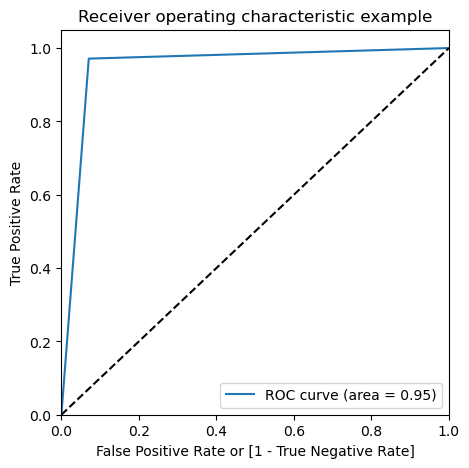

In [246]:
draw_roc(y_train,predict_train)

# Precision and Recall

In [247]:
#Using sklearn utilities for the same

In [248]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train,predict_train)

0.9475683890577508

In [249]:
recall_score(y_train,predict_train)

0.971183800623053

Making predictions on the test set

In [250]:
# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data\n\n',predict_test)

Target on test data

 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 

In [251]:
confusion2 = metrics.confusion_matrix(y_test, predict_test )
print(confusion2)

[[  5 410]
 [  1 554]]


In [252]:
# Let's check the overall accuracy.
testaccuracy= accuracy_score(y_test,predict_test)
testaccuracy

0.5762886597938144

In [253]:
# Let's see the sensitivity of our lmodel
testsensitivity=TP / float(TP+FN)
testsensitivity

0.971183800623053

In [254]:
# Let us calculate specificity
testspecificity= TN / float(TN+FP)
testspecificity

0.9293756397134084

# Final Observation:

In [255]:
# Let us compare the values obtained for Train & Test:
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))
print("Train Data Sensitivity :{} %".format(round((trainsensitivity*100),2)))
print("Train Data Specificity :{} %".format(round((trainspecificity*100),2)))
print("Test Data Accuracy     :{} %".format(round((testaccuracy*100),2)))
print("Test Data Sensitivity  :{} %".format(round((testsensitivity*100),2)))
print("Test Data Specificity  :{} %".format(round((testspecificity*100),2)))

Train Data Accuracy    :95.31 %
Train Data Sensitivity :97.12 %
Train Data Specificity :92.94 %
Test Data Accuracy     :57.63 %
Test Data Sensitivity  :97.12 %
Test Data Specificity  :92.94 %


In [261]:
# Calculate conversion rates only if there are leads in the corresponding score segments
if len(high_scoring_leads) > 0:
    high_conversion_rate = len(high_converting_leads) / len(high_scoring_leads) * 100
    print("High-Scoring Leads Conversion Rate: {:.2f}%".format(high_conversion_rate))
else:
    print("No high-scoring leads found.")

if len(medium_scoring_leads) > 0:
    medium_conversion_rate = len(medium_converting_leads) / len(medium_scoring_leads) * 100
    print("Medium-Scoring Leads Conversion Rate: {:.2f}%".format(medium_conversion_rate))
else:
    print("No medium-scoring leads found.")

if len(low_scoring_leads) > 0:
    low_conversion_rate = len(low_converting_leads) / len(low_scoring_leads) * 100
    print("Low-Scoring Leads Conversion Rate: {:.2f}%".format(low_conversion_rate))
else:
    print("No low-scoring leads found.")


No high-scoring leads found.
Medium-Scoring Leads Conversion Rate: 79.59%
Low-Scoring Leads Conversion Rate: 36.67%
